# Case Study - Telecom Churn

__Submitted by:__ Janarthanan Balasubramanian and Siva Prakash

__Client:__ Leading Telecom Firm operating in Indian and Southeast Asian market

__Problem Statement:__ In the telecom industry, there are multiple service providers. Customers actively switch from one operator to another. The cost of acquiring a new customer is 5-10 times more than the cost of retaining an existing one. So customer retention is more important than customer acquisition. The telecommunications industry experiences an average of 15-25% annual churn rate. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

__Objective:__ The objective is to build a model to identify the high-value customers at high risk of churn and identify the main indicators of churn. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

__Data Set:__ The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. We have to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

---

__A note on the Payment Model:__ In telecom industry, there are two main payment models: postpaid and prepaid. The customers in the postpaid model usually inform the operator to terminate the services before switching to another operator. But, in the prepaid model, the customer can simply stop using the services without any notice. It is hard to know whether it is an actual churn or a temporary suspension. Prepaid model is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America. So it is important to define what a churn is.

__How to define a churn?__ There are various ways to define churn.

 - __Revenue-based churn:__ Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’. The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.
 - __Usage-based churn:__ Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

__Understanding the Customer Behaviour:__ Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

 - __The ‘good’ phase:__ In this phase, the customer is happy with the service and behaves as usual.
 - __The ‘action’ phase:__ The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
 - __The ‘churn’ phase:__ In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
 
---

In [1]:
%%html
<style> table {float:left} </style>

In [2]:
import os
import random as rd

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
data_path = os.getcwd()

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.rcParams.update(plt.rcParamsDefault)

In [6]:
sns.set()

In [7]:
palette = ['blue', 'green', 'red', 'cyan', 'orange', 'magenta', 'gray']

In [8]:
data = pd.read_csv(data_path + '\\telecom_churn_data.csv', encoding = "ISO-8859-1")

In [9]:
# check the shape of the data set (number of rows and columns)

print('Number of rows: ', data.shape[0])
print('Number of cols: ', data.shape[1])

Number of rows:  99999
Number of cols:  226


---

# 1. Data Preparation

## 1.1. Getting the Data of High Value Customers

The objective in this assignment is to build a model to identify the high-value customers at high risk of churn and identify the main indicators of churn. We are going to predict the churn only on high-value customers. 

__Who is a high-value customer?__ Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). After filtering the high-value customers, you should get about 29.9k rows.

In [10]:
data[[colname for colname in list(data.columns) if 'rech' in colname]].head()

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9
0                 4                 3                 2                 6               362               252               252                 0             252             252             252               0           6/21/2014           7/16/2014            8/8/2014           9/28/2014                6/21/2014                7/16/2014                 8/8/2014                      NaN                1.0                1.0                1.0                NaN            252.0            252.0            252.0              NaN              0.0              0.0              0.0              NaN              1.0              1.0              1.0              NaN               252.0               252.0               252.0                 NaN
1                 4                 9                11                 5                74               384               283               121              44             154              65              50           6/29/2014           7/31/2014           8/28/2014           9/30/2014                      NaN                7/25/2014                8/10/2014                      NaN                NaN                1.0                2.0                NaN              NaN            154.0             25.0              NaN              NaN              1.0              2.0              NaN              NaN              0.0              0.0              NaN                 NaN               154.0                50.0                 NaN
2                 5                 4                 2                 7               168               315               116               358              86             200              86             100           6/17/2014           7/24/2014           8/14/2014           9/29/2014                      NaN                      NaN                      NaN                9/17/2014                NaN                NaN                NaN                1.0              NaN              NaN              NaN             46.0              NaN              NaN              NaN              1.0              NaN              NaN              NaN              0.0                 NaN                 NaN                 NaN                46.0
3                10                11                18                14               230               310               601               410              60              50              50              50           6/28/2014           7/31/2014           8/31/2014           9/30/2014                      NaN                      NaN                      NaN                      NaN                NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                 NaN                 NaN                 NaN                 NaN
4                 5                 6                 3                 4               196               350               287               200              56             110             110              50           6/26/2014           7/28/2014    

In [11]:
# Derived Feature - Data Recharge Amount

data['total_rech_data_amt_6'] = data['total_rech_data_6'].fillna(0) * data['av_rech_amt_data_6'].fillna(0)
data['total_rech_data_amt_7'] = data['total_rech_data_7'].fillna(0) * data['av_rech_amt_data_7'].fillna(0)
data['total_rech_data_amt_8'] = data['total_rech_data_8'].fillna(0) * data['av_rech_amt_data_8'].fillna(0)
data['total_rech_data_amt_9'] = data['total_rech_data_9'].fillna(0) * data['av_rech_amt_data_9'].fillna(0)

In [12]:
data.drop(columns = ['total_rech_data_6', 'av_rech_amt_data_6',
                     'total_rech_data_7', 'av_rech_amt_data_7',
                     'total_rech_data_8', 'av_rech_amt_data_8',
                     'total_rech_data_9', 'av_rech_amt_data_9'], inplace = True)

In [13]:
data['avg_rech_6_7'] = ((data['total_rech_amt_6'] + data['total_rech_data_amt_6']) + 
                        (data['total_rech_amt_7'] + data['total_rech_data_amt_7'])) / 2 

In [14]:
data['avg_rech_6_7'].quantile(q = 0.7)

478.0

In [15]:
hvc = data[data['avg_rech_6_7'] >= data['avg_rech_6_7'].quantile(q = 0.7)]

In [16]:
# since we have filtered the high valued customers, we can drop the derived column used for it

hvc.drop(columns = ['avg_rech_6_7'], inplace = True)

In [17]:
# check the shape of the data set (number of rows and columns)

print('Number of rows: ', hvc.shape[0])
print('Number of cols: ', hvc.shape[1])

Number of rows:  30001
Number of cols:  222


---

## 1.2. Tag the Churners

We will tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not
 - made any calls (either incoming or outgoing) - total_ic_mou_9 & total_og_mou_9 AND 
 - not used mobile internet even once in the churn phase. vol_2g_mb_9 & vol_3g_mb_9

After tagging churners, we will remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’ etc. in their names).

In [18]:
# the four features to determine the churn

cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [19]:
# check whether there are any null values in these four features

hvc[cols].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [20]:
# tagging the churners

hvc['churn'] = 0

hvc.loc[((hvc['total_ic_mou_9'] == 0) & (hvc['total_og_mou_9'] == 0)) &
        ((hvc['vol_2g_mb_9']    == 0) & (hvc['vol_3g_mb_9']    == 0)), 'churn'] = 1 

In [21]:
# rename the columns as per the convention

hvc.rename(columns = {'jun_vbc_3g': 'vbc_3g_6', 
                      'jul_vbc_3g': 'vbc_3g_7', 
                      'aug_vbc_3g': 'vbc_3g_8', 
                      'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [22]:
# Remove attributes corresponding to churn phase

hvc.drop(columns = [colname for colname in list(hvc.columns) if '_9' in colname], inplace = True)

In [23]:
# check the shape of the data set (number of rows and columns)

print('Number of rows: ', hvc.shape[0])
print('Number of cols: ', hvc.shape[1])

Number of rows:  30001
Number of cols:  169


In [24]:
hvc['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [25]:
%matplotlib inline

Text(0.5, 1.0, 'Churn Status Distribution')

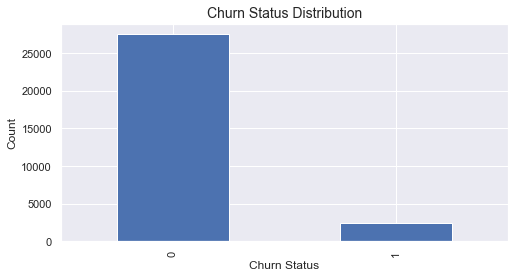

In [26]:
plt.figure(figsize=(8,4))
hvc['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.title('Churn Status Distribution', fontsize=14)

The customers churned is 2433 out of 29953 records which is ~8% only. The dataset is an imbalanced one. **What is an Imbalanced data?** Imbalance means that the number of data points available for the classes is different. Let's say if there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 85%-90% points for one class and 10%-15% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

---

## 1.3. Derived Features

In the first section we have already created few derived variables. total_rech_data_amt_m by multiplying total_rech_data_m abd av_rech_amt_data_m. There are few date columns, which cannot be directly used in model building. We will convert them into day of the month. 

In [27]:
datecols = [colname for colname in list(hvc.columns) if 'date' in colname]

In [28]:
hvc[datecols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 9 columns):
last_date_of_month_6        30001 non-null object
last_date_of_month_7        29974 non-null object
last_date_of_month_8        29836 non-null object
date_of_last_rech_6         29928 non-null object
date_of_last_rech_7         29903 non-null object
date_of_last_rech_8         29418 non-null object
date_of_last_rech_data_6    16756 non-null object
date_of_last_rech_data_7    17057 non-null object
date_of_last_rech_data_8    15953 non-null object
dtypes: object(9)
memory usage: 2.3+ MB


In [29]:
hvc[datecols].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8
0             6/30/2014            7/31/2014            8/31/2014           6/21/2014           7/16/2014            8/8/2014                6/21/2014                7/16/2014                 8/8/2014
7             6/30/2014            7/31/2014            8/31/2014           6/27/2014           7/25/2014           8/26/2014                      NaN                      NaN                      NaN
8             6/30/2014            7/31/2014            8/31/2014           6/25/2014           7/31/2014           8/30/2014                      NaN                7/31/2014                8/23/2014
21            6/30/2014            7/31/2014            8/31/2014           6/30/2014           7/31/2014           8/31/2014                      NaN                      NaN                      NaN
23            6/30/2014            7/31/2014            8/31/2014           6/18/2014            7/7/2014           8/24/2014                      NaN                 7/7/2014                 8/6/2014

In [30]:
hvc['last_date_of_month_6'] = hvc['last_date_of_month_6'].fillna('6/30/2014')
hvc['last_date_of_month_7'] = hvc['last_date_of_month_7'].fillna('7/31/2014')
hvc['last_date_of_month_8'] = hvc['last_date_of_month_8'].fillna('8/31/2014')

In [31]:
# the dates are stored as string; let us convert into dates

for col in datecols: hvc[col] = pd.to_datetime(hvc[col])

In [32]:
hvc[datecols].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8
0            2014-06-30           2014-07-31           2014-08-31          2014-06-21          2014-07-16          2014-08-08               2014-06-21               2014-07-16               2014-08-08
7            2014-06-30           2014-07-31           2014-08-31          2014-06-27          2014-07-25          2014-08-26                      NaT                      NaT                      NaT
8            2014-06-30           2014-07-31           2014-08-31          2014-06-25          2014-07-31          2014-08-30                      NaT               2014-07-31               2014-08-23
21           2014-06-30           2014-07-31           2014-08-31          2014-06-30          2014-07-31          2014-08-31                      NaT                      NaT                      NaT
23           2014-06-30           2014-07-31           2014-08-31          2014-06-18          2014-07-07          2014-08-24                      NaT               2014-07-07               2014-08-06

Let us convert these into numeric value by creating a derived field how many days beore the last date of the month did the customer do the last recharge. If the date of last recharge is null, it means that the customer did not recharge and so we can use 0.

In [33]:
# create columns with only the day of recharge

hvc['last_rech_6'] = hvc['date_of_last_rech_6'].dt.day
hvc['last_rech_7'] = hvc['date_of_last_rech_7'].dt.day
hvc['last_rech_8'] = hvc['date_of_last_rech_8'].dt.day

hvc['last_rech_data_6'] = hvc['date_of_last_rech_data_6'].dt.day
hvc['last_rech_data_7'] = hvc['date_of_last_rech_data_7'].dt.day
hvc['last_rech_data_8'] = hvc['date_of_last_rech_data_8'].dt.day

In [34]:
daycols = ['last_rech_6', 'last_rech_7', 'last_rech_8', 'last_rech_data_6', 'last_rech_data_7', 'last_rech_data_8']

In [35]:
# impute null values with 0 - indicates that the customer did not recharge

hvc[daycols] = hvc[daycols].fillna(0).astype('int')

In [36]:
hvc[daycols].head()

last_rech_6  last_rech_7  last_rech_8  last_rech_data_6  last_rech_data_7  last_rech_data_8
0            21           16            8                21                16                 8
7            27           25           26                 0                 0                 0
8            25           31           30                 0                31                23
21           30           31           31                 0                 0                 0
23           18            7           24                 0                 7                 6

In [37]:
# drop the date columns

hvc.drop(columns = datecols, inplace = True)

---

## 1.4. Removing Columns without Variability

We can drop the variables without any variability i.e. all observations has the same value for that variable.

In [38]:
# check data type, unique values, null values and null percentage

info = pd.concat([pd.DataFrame(hvc.dtypes), 
                  pd.DataFrame(hvc.nunique()), 
                  pd.DataFrame(hvc.isnull().sum()),
                  pd.DataFrame(round(100 * (hvc.isnull().sum() / len(hvc.index)), 2))], axis = 1).reset_index()

info.columns = ['Variable', 'Data Type', 'Unique Values', 'Null Values', 'Null Percentage']

In [39]:
info[info['Unique Values'] == 1]

Variable Data Type  Unique Values  Null Values  Null Percentage
1          circle_id     int64              1            0             0.00
2     loc_og_t2o_mou   float64              1          224             0.75
3     std_og_t2o_mou   float64              1          224             0.75
4     loc_ic_t2o_mou   float64              1          224             0.75
44  std_og_t2c_mou_6   float64              1          545             1.82
45  std_og_t2c_mou_7   float64              1          537             1.79
46  std_og_t2c_mou_8   float64              1         1174             3.91
83  std_ic_t2o_mou_6   float64              1          545             1.82
84  std_ic_t2o_mou_7   float64              1          537             1.79
85  std_ic_t2o_mou_8   float64              1         1174             3.91

In [40]:
cols_without_variability = list(info[info['Unique Values'] == 1]['Variable'])

In [41]:
hvc.drop(columns = cols_without_variability, inplace = True)

Contrarily, we see that mobile number is unique for each record. This can be converted into the index of the dataset.

In [42]:
hvc.set_index('mobile_number', inplace = True)

---

## 1.5. Dealing with the Null and Missing Values

In [43]:
%matplotlib inline

In [44]:
# check data type, unique values, null values and null percentage

info = pd.concat([pd.DataFrame(hvc.dtypes), 
                  pd.DataFrame(hvc.nunique()), 
                  pd.DataFrame(hvc.isnull().sum()),
                  pd.DataFrame(round(100 * (hvc.isnull().sum() / len(hvc.index)), 2))], axis = 1).reset_index()

info.columns = ['Variable', 'Data Type', 'Unique Values', 'Null Values', 'Null Percentage']

In [45]:
nulls = info[info['Null Percentage'] > 0].sort_values(by = 'Null Values', ascending = False)

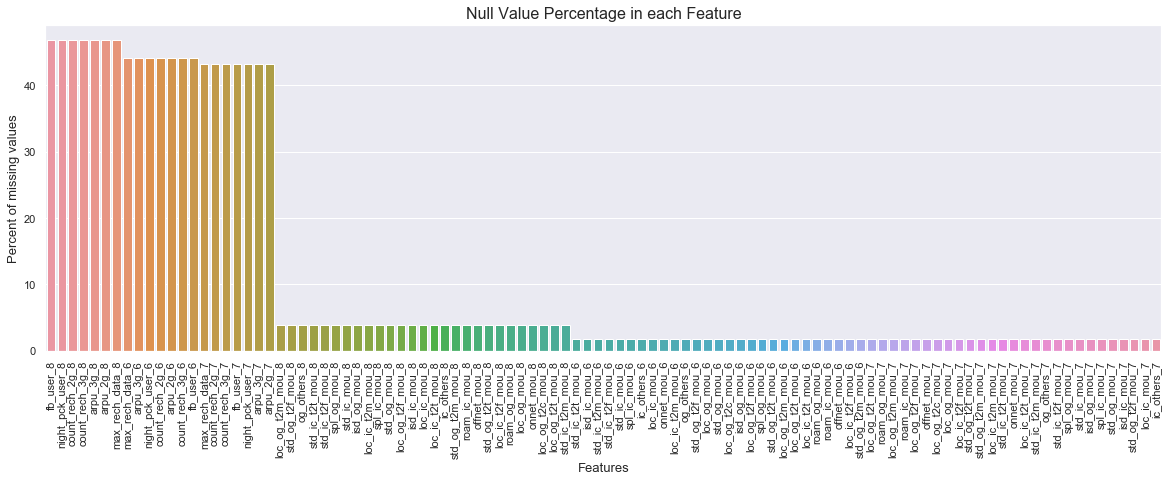

In [46]:
f, ax = plt.subplots(figsize = (20, 6))
plt.xticks(rotation='90')
sns.barplot(data = nulls, x = 'Variable', y = 'Null Percentage')
plt.xlabel('Features', fontsize = 13)
plt.ylabel('Percent of missing values', fontsize = 13)
plt.title('Null Value Percentage in each Feature', fontsize = 16)
plt.show()

### 1.5.1. Handling Null Values in Minutes of Usage

IC stands for incoming call usage and OG stands for outgoing call usage. MOU stands for minutes of usage. It is a continuous numeric field. The minutes of usage fields has the following relationships (m stands for month and can be substituted with 6, 7, or 8):

```(1) loc_og_mou_m = loc_og_t2t_mou_m + loc_og_t2m_mou_m + loc_og_t2f_mou_m```

```(2) std_og_mou_m = std_og_t2t_mou_m + std_og_t2m_mou_m + std_og_t2f_mou_m```

```(3) loc_ic_mou_m = loc_ic_t2t_mou_m + loc_ic_t2m_mou_m + loc_ic_t2f_mou_m```

```(4) std_ic_mou_m = std_ic_t2t_mou_m + std_ic_t2m_mou_m + std_ic_t2f_mou_m```

```(5) total_og_mou_m = loc_og_mou_m + std_og_mou_m + isd_og_mou_m + spl_og_mou_m + og_others_m```

```(6) total_ic_mou_m = loc_ic_mou_m + std_ic_mou_m + spl_ic_mou_m + isd_ic_mou_m + ic_others_m```

In [47]:
mou_cols = list(info[info['Variable'].str.contains('mou')]['Variable'])

In [48]:
mou_cols.extend(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', ])

In [49]:
hvc[mou_cols].describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  \
count  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000   29456.000000   29464.000000   28827.000000   29456.000000   29464.000000   28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000  29456.000000  29464.000000  28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000    30001.000000    30001.000000    30001.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000  29456.000000  29464.000000  28827.000000      29456.000000   
mean     265.618262    272.700470    243.646938    380.608111    384.994337    348.723294      16.408431      12.872921      13.009645      27.063178      20.519370      20.674656         86.047905         87.235755         81.256858        166.263652        165.980922        157.937216          6.461494          6.540759          6.126112          1.604247          1.924320          1.777295    258.781428    259.765948    245.328371        168.954534        177.409496        154.486547        182.753296        191.345743        163.758261          1.836917          1.859332          1.649273    353.548540    370.618355    319.897555      2.211703      2.144122      2.028343      5.925921      7.238206      6.824251      609.866251      628.366047      551.678812         66.664313         67.851431         65.169653        153.195349        154.388675        152.188163         15.561152         16.327824         14.989754    235.430623    238.577812    232.357291         15.170365   
std      462.493645    482.972367    465.200856    484.257474    500.807874    486.918550      76.973057      76.454034      75.575865     117.218920      96.933381     106.751862        230.609510        242.427257        231.399901        251.423301        242.754684        236.315181         22.310305         22.125961         19.858510          6.357757          9.238487          7.345047    380.226723    377.227177    367.505268        406.914141        424.347895        404.426554        412.056950        436.816512        416.088724         12.087212         13.095663         11.147419    612.382663    643.696568    618.022200     46.273483     45.957517     45.611669     17.711012     21.964629     20.677329      690.873430      717.219171      700.478180        165.002284        168.678411        161.602601        220.251819        219.252313        217.137562         46.125606         49.563887         44.078609    316.131788    317.260100    311.154100         78.384516   
min        0

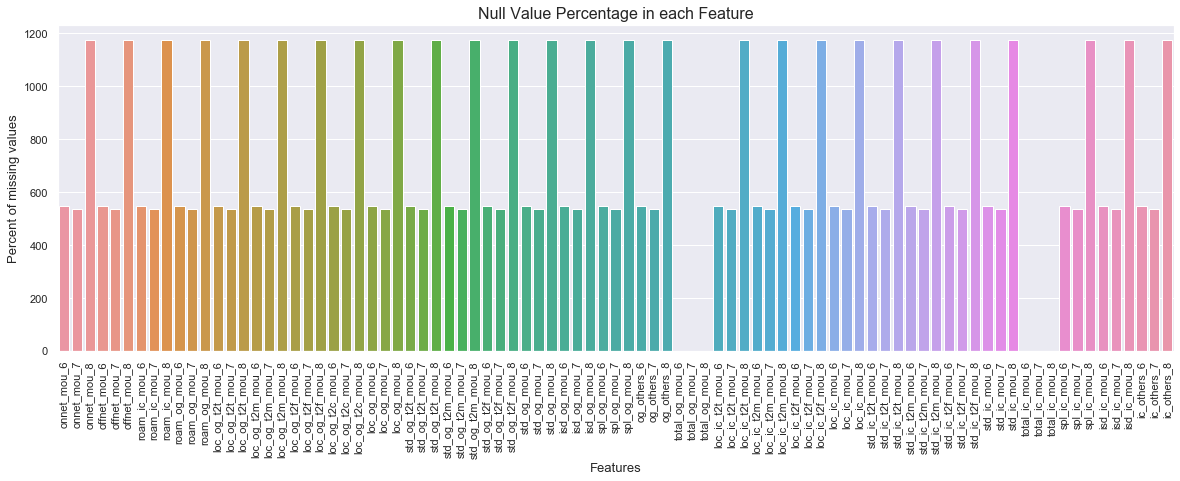

In [50]:
f, ax = plt.subplots(figsize = (20, 6))
plt.xticks(rotation='90')
sns.barplot(data = info[info['Variable'].isin(mou_cols)], x = 'Variable', y = 'Null Values')
plt.xlabel('Features', fontsize = 13)
plt.ylabel('Percent of missing values', fontsize = 13)
plt.title('Null Value Percentage in each Feature', fontsize = 16)
plt.show()

In [51]:
hvc[mou_cols] = hvc[mou_cols].fillna(0)

In [52]:
# validating based on the above equations for the month of June

print('For the month of June: ')

print('Rows violating equation 1: ', hvc[round(hvc['loc_og_t2t_mou_6'] + hvc['loc_og_t2m_mou_6'] + hvc['loc_og_t2f_mou_6'] - hvc['loc_og_mou_6'], 0) != 0].shape[0])
print('Rows violating equation 2: ', hvc[round(hvc['std_og_t2t_mou_6'] + hvc['std_og_t2m_mou_6'] + hvc['std_og_t2f_mou_6'] - hvc['std_og_mou_6'], 0) != 0].shape[0])
print('Rows violating equation 3: ', hvc[round(hvc['loc_ic_t2t_mou_6'] + hvc['loc_ic_t2m_mou_6'] + hvc['loc_ic_t2f_mou_6'] - hvc['loc_ic_mou_6'], 0) != 0].shape[0])
print('Rows violating equation 4: ', hvc[round(hvc['std_ic_t2t_mou_6'] + hvc['std_ic_t2m_mou_6'] + hvc['std_ic_t2f_mou_6'] - hvc['std_ic_mou_6'], 0) != 0].shape[0])

print('Rows violating equation 5: ', hvc[round(hvc['loc_og_mou_6'] + hvc['std_og_mou_6'] + hvc['isd_og_mou_6'] + hvc['spl_og_mou_6'] + hvc['og_others_6'] - hvc['total_og_mou_6'], 0) != 0].shape[0])
print('Rows violating equation 6: ', hvc[round(hvc['loc_ic_mou_6'] + hvc['std_ic_mou_6'] + hvc['isd_ic_mou_6'] + hvc['spl_ic_mou_6'] + hvc['ic_others_6'] - hvc['total_ic_mou_6'], 0) != 0].shape[0])

print()

# validating based on the above equations for the month of July

print('For the month of July: ')

print('Rows violating equation 1: ', hvc[round(hvc['loc_og_t2t_mou_7'] + hvc['loc_og_t2m_mou_7'] + hvc['loc_og_t2f_mou_7'] - hvc['loc_og_mou_7'], 0) != 0].shape[0])
print('Rows violating equation 2: ', hvc[round(hvc['std_og_t2t_mou_7'] + hvc['std_og_t2m_mou_7'] + hvc['std_og_t2f_mou_7'] - hvc['std_og_mou_7'], 0) != 0].shape[0])
print('Rows violating equation 3: ', hvc[round(hvc['loc_ic_t2t_mou_7'] + hvc['loc_ic_t2m_mou_7'] + hvc['loc_ic_t2f_mou_7'] - hvc['loc_ic_mou_7'], 0) != 0].shape[0])
print('Rows violating equation 4: ', hvc[round(hvc['std_ic_t2t_mou_7'] + hvc['std_ic_t2m_mou_7'] + hvc['std_ic_t2f_mou_7'] - hvc['std_ic_mou_7'], 0) != 0].shape[0])

print('Rows violating equation 5: ', hvc[round(hvc['loc_og_mou_7'] + hvc['std_og_mou_7'] + hvc['isd_og_mou_7'] + hvc['spl_og_mou_7'] + hvc['og_others_7'] - hvc['total_og_mou_7'], 0) != 0].shape[0])
print('Rows violating equation 6: ', hvc[round(hvc['loc_ic_mou_7'] + hvc['std_ic_mou_7'] + hvc['isd_ic_mou_7'] + hvc['spl_ic_mou_7'] + hvc['ic_others_7'] - hvc['total_ic_mou_7'], 0) != 0].shape[0])

print()

# validating based on the above equations for the month of August

print('For the month of August: ')

print('Rows violating equation 1: ', hvc[round(hvc['loc_og_t2t_mou_8'] + hvc['loc_og_t2m_mou_8'] + hvc['loc_og_t2f_mou_8'] - hvc['loc_og_mou_8'], 0) != 0].shape[0])
print('Rows violating equation 2: ', hvc[round(hvc['std_og_t2t_mou_8'] + hvc['std_og_t2m_mou_8'] + hvc['std_og_t2f_mou_8'] - hvc['std_og_mou_8'], 0) != 0].shape[0])
print('Rows violating equation 3: ', hvc[round(hvc['loc_ic_t2t_mou_8'] + hvc['loc_ic_t2m_mou_8'] + hvc['loc_ic_t2f_mou_8'] - hvc['loc_ic_mou_8'], 0) != 0].shape[0])
print('Rows violating equation 4: ', hvc[round(hvc['std_ic_t2t_mou_8'] + hvc['std_ic_t2m_mou_8'] + hvc['std_ic_t2f_mou_8'] - hvc['std_ic_mou_8'], 0) != 0].shape[0])

print('Rows violating equation 5: ', hvc[round(hvc['loc_og_mou_8'] + hvc['std_og_mou_8'] + hvc['isd_og_mou_8'] + hvc['spl_og_mou_8'] + hvc['og_others_8'] - hvc['total_og_mou_8'], 0) != 0].shape[0])
print('Rows violating equation 6: ', hvc[round(hvc['loc_ic_mou_8'] + hvc['std_ic_mou_8'] + hvc['isd_ic_mou_8'] + hvc['spl_ic_mou_8'] + hvc['ic_others_8'] - hvc['total_ic_mou_8'], 0) != 0].shape[0])

For the month of June: 
Rows violating equation 1:  0
Rows violating equation 2:  0
Rows violating equation 3:  0
Rows violating equation 4:  0
Rows violating equation 5:  0
Rows violating equation 6:  0

For the month of July: 
Rows violating equation 1:  0
Rows violating equation 2:  0
Rows violating equation 3:  0
Rows violating equation 4:  0
Rows violating equation 5:  0
Rows violating equation 6:  0

For the month of August: 
Rows violating equation 1:  0
Rows violating equation 2:  0
Rows violating equation 3:  0
Rows violating equation 4:  0
Rows violating equation 5:  0
Rows violating equation 6:  0


So, we can conclude that imputing with 0 is the right decision. total_og_mou_m and total_ic_mou_m does not have any null values. If this field is 0, then we have to assume that there is no usage of incoming or outgoing. Since this field is derived as the sum of other fields, any null values in those fields, if imputed with non zero values should also affect this field. 

**The features that can be expressed in terms of other features can be dropped to avoid multicollinearity.**

In [53]:
dependentcols = ['loc_og_mou_6', 'std_og_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 
                 'loc_og_mou_7', 'std_og_mou_7', 'loc_ic_mou_7', 'std_ic_mou_7', 
                 'loc_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8' ]

In [54]:
hvc.drop(columns = dependentcols, inplace = True)

### 1.5.2. Handling Null Values in Recharge Amount

In [55]:
rech_cols = list(info[(info['Variable'].str.contains('rech')) &
                      (~info['Variable'].str.contains('date'))]['Variable'])

In [56]:
hvc[rech_cols][(hvc['max_rech_data_6'].isnull() == True) | 
               (hvc['max_rech_data_7'].isnull() == True) | 
               (hvc['max_rech_data_8'].isnull() == True) | 
               (hvc['count_rech_2g_6'].isnull() == True) | 
               (hvc['count_rech_2g_7'].isnull() == True) | 
               (hvc['count_rech_2g_8'].isnull() == True) | 
               (hvc['count_rech_3g_6'].isnull() == True) | 
               (hvc['count_rech_3g_7'].isnull() == True) | 
               (hvc['count_rech_3g_8'].isnull() == True) ]

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  total_rech_data_amt_6  total_rech_data_amt_7  total_rech_data_amt_8  last_rech_6  last_rech_7  last_rech_8  last_rech_data_6  last_rech_data_7  last_rech_data_8
mobile_number                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
7000701601                    5                 5                 7              1580               790              3638            1580             790            1580              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                    0.0                    0.0                    0.0           27           25           26                 0                 0                 0
7001524846                   19                21                14               437               601               120              90             154              30              NaN            154.0             23.0              NaN              2.0              3.0              NaN              0.0              0.0                    0.0                  354.0                  207.0           25           31           30                 0                31                23
7002124215                   22                26                27               600               680               718              50              50              50              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                    0.0                    0.0                    0.0           30           31           31                 0                 0                 0
7000887461                    3                 5                 4                 0               454               439               0             179             179              NaN            179.0            179.0              NaN              0.0              0.0              NaN              2.0              2.0                    0.0                  712.0                  540.0           18            7           24                 0                 7                 6
7000815202                   27                22                 6               420               636               416              30             110             130              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN                    0.0                    0.0                    0.0           30           28           24                 0                 0                 0
...                         ...               ...               ...               ...               ...               ...             ...             ...             ...              ...              ...              ...              ...              ...              ...              ...              ...              ...                    ...                    ...                    ...          ...          ...          ...               ...               ...               ...
7000258042                    9                10                 5               127               311               120              

In [57]:
hvc[rech_cols].describe()

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  total_rech_data_amt_6  total_rech_data_amt_7  total_rech_data_amt_8   last_rech_6   last_rech_7   last_rech_8  last_rech_data_6  last_rech_data_7  last_rech_data_8
count      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000    30001.000000    30001.000000    30001.000000     16756.000000     17057.000000     15953.000000     16756.000000     17057.000000     15953.000000     16756.000000     17057.000000     15953.000000           30001.000000           30001.000000           30001.000000  30001.000000  30001.000000  30001.000000      30001.000000      30001.000000      30001.000000
mean          11.851005         11.718843          9.972868        660.732342        660.498017        584.365454      169.284824      172.201727      160.144462       139.798580       140.431143       136.329217         2.221175         2.457642         2.272676         0.764801         0.802955         0.777471             455.777166             528.233732             463.252944     26.398320     27.180527     26.168928         11.266158         11.974034         10.805006
std            9.429132          9.432418          9.274370        561.032865        582.430876        611.245907      175.315958      181.390742      173.207799       118.851784       120.247247       119.531924         3.005300         3.235315         3.112685         1.477739         1.617808         1.667737            1418.671074            1476.036563            1622.766035      4.845796      4.837576      6.388573         11.795880         12.237130         11.945277
min            0.000000          0.000000          0.000000          0.000000          0.000000          0.000000        0.000000        0.000000        0.000000         1.000000         1.000000         1.000000         0.000000         0.000000         0.000000         0.000000         0.000000         0.000000               0.000000               0.000000               0.000000      0.000000      0.000000      0.000000          0.000000          0.000000          0.000000
25%            6.000000          6.000000          4.000000        360.000000        352.000000        250.000000      110.000000      110.000000       50.000000        25.000000        25.000000        25.000000         0.000000         0.000000         0.000000         0.000000         0.000000         0.000000               0.000000               0.000000               0.000000     25.000000     26.000000     25.000000          0.000000          0.000000          0.000000
50%            9.000000          9.000000          8.000000        566.000000        562.000000        490.000000      120.000000      128.000000      130.000000       152.000000       152.000000       152.000000         1.000000         1.000000         1.000000         0.000000         0.000000         0.000000              92.000000             100.000000              25.000000     28.000000     29.000000     28.000000          7.000000          9.000000          5.000000
75%           15.000000         15.000000         13.000000        834.000000        831.000000        776.000000      200.000000      200.000000      198.000000       198.000000       198.000000       198.000000         3.000000         3.000000         3.000000         1.000000         1.000000         1.000000             400.000000             575.000000             304.000000     30.000000     31.000000     30.000000         24.000000         25.000000         23.000000
max          307.000000        138.000000        196.000000      35190.000000      40335.000000      45320.000000     4010.000000     4010.000000     4449.000000      

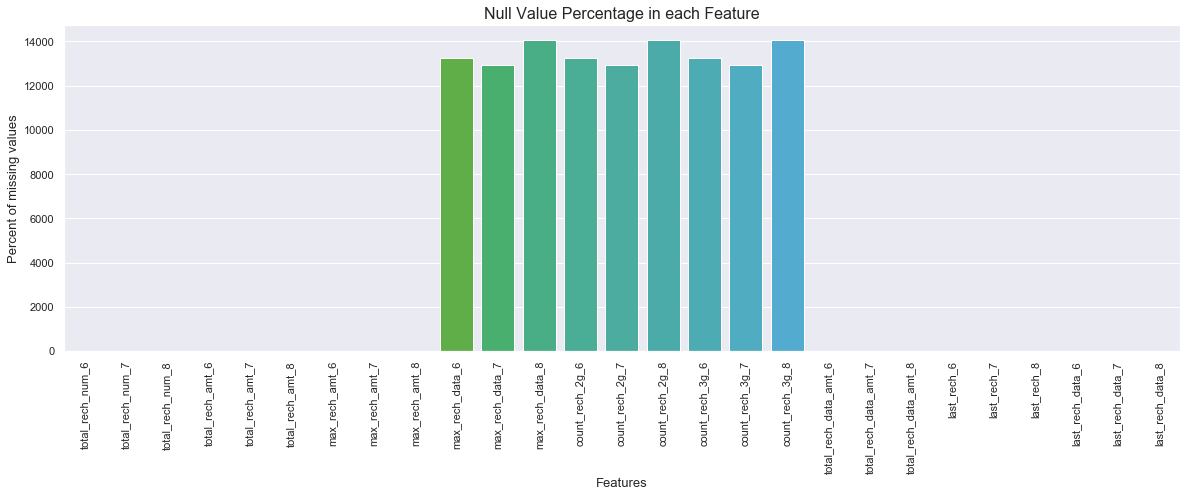

In [58]:
f, ax = plt.subplots(figsize = (20, 6))
plt.xticks(rotation='90')
sns.barplot(data = info[info['Variable'].isin(rech_cols)], x = 'Variable', y = 'Null Values')
plt.xlabel('Features', fontsize = 13)
plt.ylabel('Percent of missing values', fontsize = 13)
plt.title('Null Value Percentage in each Feature', fontsize = 16)
plt.show()

Null in recharge amount means that the customer did not recharge. This is evident from the fact that, in all the rows where we find null values, we see that total_rech_data_amt_m is 0. When the customer has not recharged in a particular month, the max_rech_data_m for that month and count_rech_2g_m or count_reh_3g_m also will be 0. So the null values can be imputed with 0.

In [59]:
hvc[rech_cols] = hvc[rech_cols].fillna(0)

### 1.5.3. Handling Null Values in Average Revenue Per User (ARPU)

**ARPU** stands for average revenue per user. A null value indicates that there is no revenue and hence, can be imputed with 0.

In [60]:
arpu_cols = list(info[info['Variable'].str.contains('arpu')]['Variable'])

In [61]:
hvc[arpu_cols].describe()

arpu_6        arpu_7        arpu_8     arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_2g_6     arpu_2g_7     arpu_2g_8
count  30001.000000  30001.000000  30001.000000  16756.000000  17057.000000  15953.000000  16756.000000  17057.000000  15953.000000
mean     558.490824    560.782203    508.597957    119.974696    120.695809    118.050972    113.585859    113.801227    109.817427
std      460.640461    479.776947    501.961981    226.092738    229.575385    218.941369    201.792701    206.066861    195.348610
min    -2258.709000  -2014.045000   -945.808000    -30.280000    -26.040000    -24.490000    -15.320000    -15.480000    -24.430000
25%      309.865000    309.826000    231.473000      0.000000      0.000000      0.000000      0.010000      0.000000      0.000000
50%      481.694000    480.943000    427.585000     15.480000     12.950000     10.020000     26.915000     24.000000     19.900000
75%      699.943000    698.315000    661.491000    177.787500    180.040000    179.490000    168.517500    166.910000    157.190000
max    27731.088000  35145.834000  33543.624000   6362.280000   4980.900000   3716.900000   6433.760000   4809.360000   3467.170000

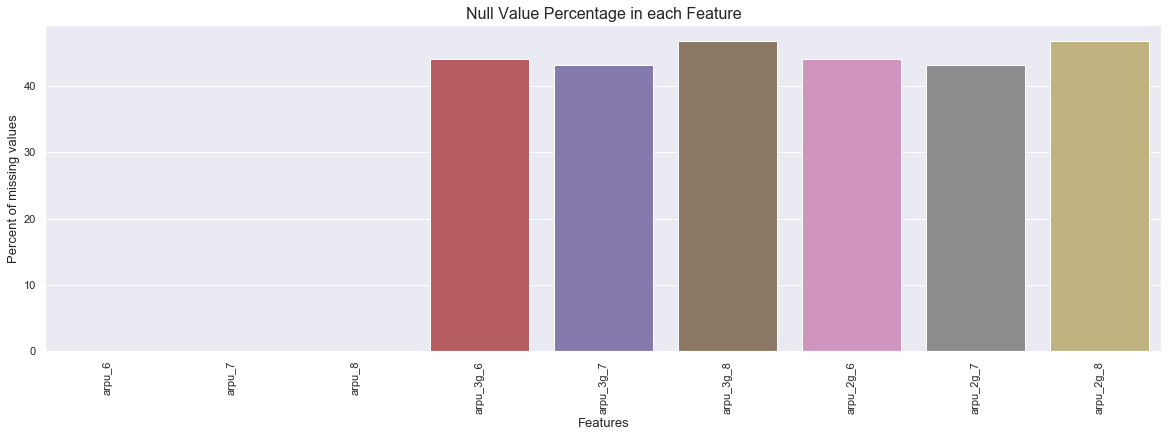

In [62]:
f, ax = plt.subplots(figsize = (20, 6))
plt.xticks(rotation='90')
sns.barplot(data = info[info['Variable'].isin(arpu_cols)], x = 'Variable', y = 'Null Percentage')
plt.xlabel('Features', fontsize = 13)
plt.ylabel('Percent of missing values', fontsize = 13)
plt.title('Null Value Percentage in each Feature', fontsize = 16)
plt.show()

In [63]:
hvc[arpu_cols][hvc['arpu_6'] < 0].head()

arpu_6    arpu_7    arpu_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8
mobile_number                                                                                                
7000238486     -160.795   165.590   384.850        NaN        NaN        NaN        NaN        NaN        NaN
7002023348      -67.930   520.770   151.520        NaN     398.62     212.18        NaN     398.61     212.17
7000037116      -88.306   626.231   363.066        NaN      99.20        NaN        NaN      85.01        NaN
7001528357    -2041.228  3972.710  -945.808        NaN        NaN        NaN        NaN        NaN        NaN
7000293126      -33.158   854.844  1923.055        NaN        NaN     799.84        NaN        NaN    1583.67

In [64]:
hvc[arpu_cols] = hvc[arpu_cols].fillna(0)

### 1.5.4. Handling Null Values in Categorical Variables

night_pck_user_m and fb_user_m are defined as float data type, but they are categorical variables. It takes a 0 or 1 value indicating the service is used by customer or not. The other categorical variables are: monthly_2g_m, monthly_3g_m, sachet_2g_m, sachet_3g_m, count_rech_2g_m, count_rech_3g_m. These fields do not have any null values and also has more than 2 levels. We see that there are null values in night_pck_user_m and fb_user_m. It can be **imputed as 0**, indicating that the customer is not using that service.

In [65]:
cols_usage = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

In [66]:
# preparing a data set with the levels and value counts for binary variables

levels = pd.DataFrame(columns = ['Value', 'Count', 'Variable'])

for column in cols_usage: 
    temp = hvc[column].value_counts().reset_index()
    temp.rename(columns = {'index' : 'Value', column : 'Count'}, inplace = True)
    temp['Variable'] = column
    levels = levels.append(temp)
    
levels = levels[['Variable', 'Value', 'Count']]

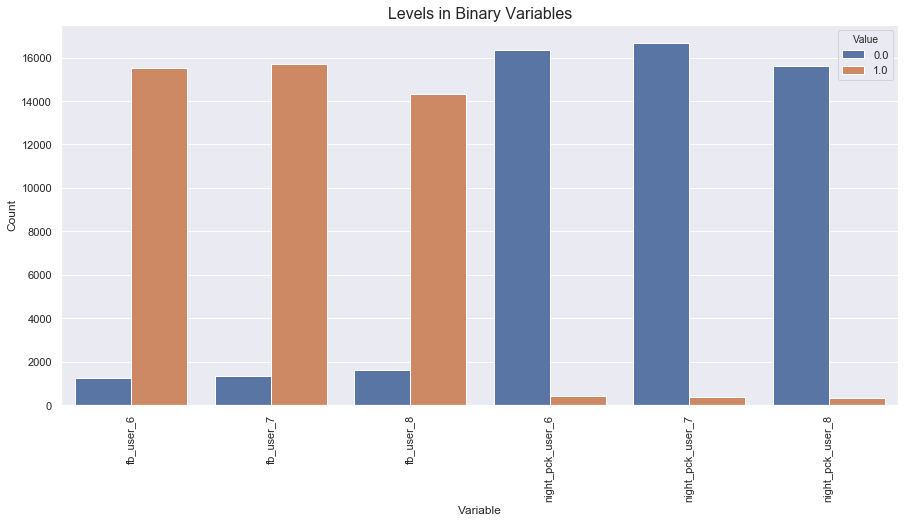

In [67]:
# plotting the binary variables

plt.figure(figsize=(15,7))
ax = sns.barplot(data = levels, x = 'Variable', y = 'Count', hue = 'Value')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Levels in Binary Variables', fontsize = 16)
plt.show()

In [68]:
hvc[cols_usage].describe()

fb_user_6     fb_user_7     fb_user_8  night_pck_user_6  night_pck_user_7  night_pck_user_8
count  16756.000000  17057.000000  15953.000000      16756.000000      17057.000000      15953.000000
mean       0.926534      0.921733      0.897198          0.024290          0.021985          0.021375
std        0.260908      0.268599      0.303710          0.153952          0.146639          0.144636
min        0.000000      0.000000      0.000000          0.000000          0.000000          0.000000
25%        1.000000      1.000000      1.000000          0.000000          0.000000          0.000000
50%        1.000000      1.000000      1.000000          0.000000          0.000000          0.000000
75%        1.000000      1.000000      1.000000          0.000000          0.000000          0.000000
max        1.000000      1.000000      1.000000          1.000000          1.000000          1.000000

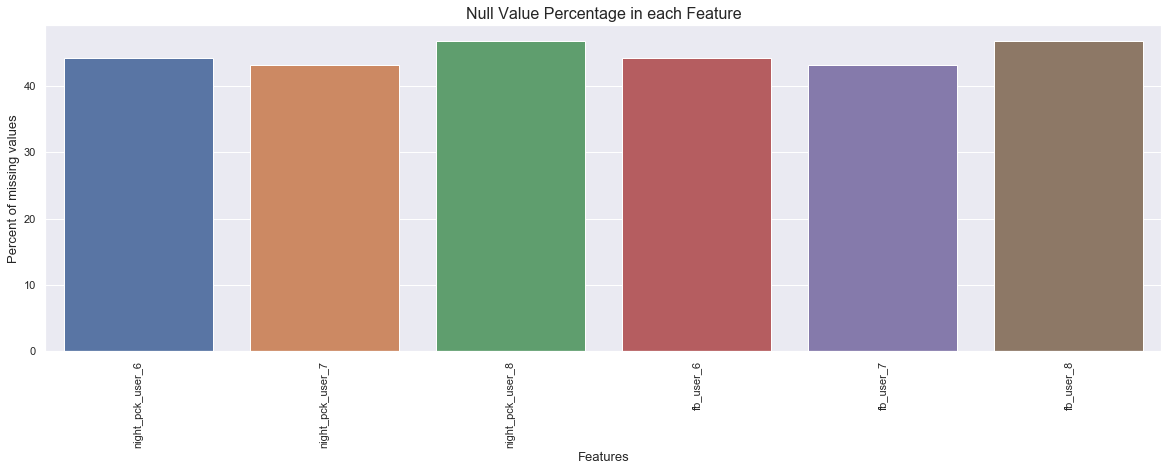

In [69]:
f, ax = plt.subplots(figsize = (20, 6))
plt.xticks(rotation='90')
sns.barplot(data = info[info['Variable'].isin(cols_usage)], x = 'Variable', y = 'Null Percentage')
plt.xlabel('Features', fontsize = 13)
plt.ylabel('Percent of missing values', fontsize = 13)
plt.title('Null Value Percentage in each Feature', fontsize = 16)
plt.show()

In [70]:
hvc[cols_usage] = hvc[cols_usage].fillna(0)

---

In [71]:
hvc.shape

(30001, 143)

In [72]:
info = pd.concat([pd.DataFrame(hvc.dtypes), 
                  pd.DataFrame(hvc.nunique()), 
                  pd.DataFrame(hvc.isnull().sum()),
                  pd.DataFrame(round(100 * (hvc.isnull().sum() / len(hvc.index)), 2))], axis = 1).reset_index()

info.columns = ['Variable', 'Data Type', 'Unique Values', 'Null Values', 'Null Percentage']

In [73]:
print('Columns with Null Values: ', info['Null Values'][info['Null Values'] != 0].count())

Columns with Null Values:  0


---

## 1.6. Checking the Skewness

### 1.6.1. Categorical Variables

The categorical variables are: monthly_2g_m, monthly_3g_m, sachet_2g_m, sachet_3g_m, count_rech_2g_m, count_rech_3g_m, night_pck_user_m and fb_user_m. If majority of values belong to one category, then we can drop those fields too.

In [74]:
catvar = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
          'monthly_3g_6','monthly_3g_7','monthly_3g_8', 
          'sachet_2g_6','sachet_2g_7','sachet_2g_8', 
          'sachet_3g_6','sachet_3g_7','sachet_3g_8', 
          'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8', 
          'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8', 
          'night_pck_user_6','night_pck_user_7','night_pck_user_8', 
          'fb_user_6', 'fb_user_7', 'fb_user_8']          

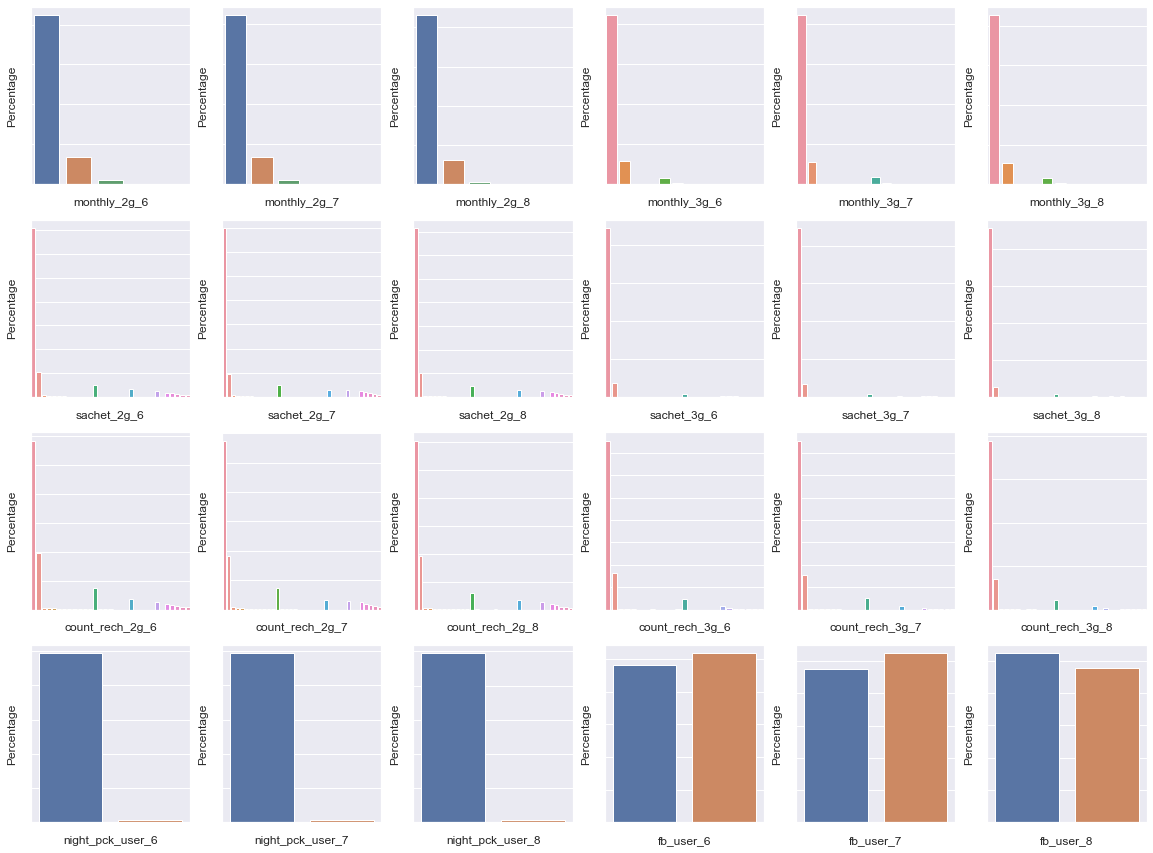

In [75]:
fig, axes = plt.subplots(4, 6, figsize=(20, 15))

i = 0; j = 0

for column in catvar:
    
    levels = hvc[column].astype('str').value_counts().reset_index()
    levels.rename(columns = {'index' : column, column : 'Count'}, inplace = True)
    levels['Percentage'] = round((levels['Count'] / len(hvc.index) * 100), 2)
    levels.sort_values(by = 'Count', ascending = False)
    ax = sns.barplot(data = levels, x = column, y = 'Percentage', ax = axes[i][j])
    ax.set(xticklabels=[]); ax.set(yticklabels=[])
    
    j = j + 1
    if j == 6: i = i + 1; j = 0
    
plt.show()

In [76]:
high_skew_cat = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                 'monthly_3g_6','monthly_3g_7','monthly_3g_8', 
                 'sachet_2g_6','sachet_2g_7','sachet_2g_8', 
                 'sachet_3g_6','sachet_3g_7','sachet_3g_8',           
                 'night_pck_user_6','night_pck_user_7','night_pck_user_8'] 

In [77]:
hvc.drop(columns = high_skew_cat, inplace = True)

### 1.6.2. Numeric Variables

Skew = 3 * (Mean – Median) / Standard Deviation

**Skewness** between – 1.0 and + 1.0 gives a normal distribution. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed), the data are moderately skewed. If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

**Kurtosis** describes the extreme values in one tail versus the other tail. It does not measure the peakedness or flatness of the distribution. It is actually the measure of outliers present in the distribution. If the kurtosis is high, it means that the data has a lot of outliers. Low kurtosis indicates absence of outliers. The standard normal distribution has a kurtosis of 3.

In [78]:
# Let us explore the descriptive statistics of the columns in our dataframe

stats = pd.DataFrame(hvc.describe(percentiles = [.01, .25, .5, .75, .9, .95, .99]).T).reset_index()
stats = stats.round(decimals = 2)

stats.rename(columns = {'index' : 'var',  
                        '50%'   : 'median', 
                        '25%'   : 'q1', 
                        '75%'   : 'q3'}, inplace = True)

stats['iqr']      = stats['q3'] - stats['q1']
stats['count']    = stats['count'].astype('int')

skew = pd.DataFrame(hvc[stats['var']].skew().round(2)).reset_index(); skew.columns = ['var', 'skew']
kurt = pd.DataFrame(hvc[stats['var']].kurtosis().round(2)).reset_index(); kurt.columns = ['var', 'kurt']

stats = pd.merge(stats, pd.merge(skew, kurt, how = 'inner', on = 'var'), how = 'inner', on = 'var')

stats = stats[['var', 'count', 'min', 'max', 'mean', 'median', 
               'std', 'q1', 'q3', 'iqr', 'skew', 'kurt', 
               '1%', '90%', '95%', '99%']]

In [79]:
stats = stats[~stats['var'].isin(catvar)]

In [80]:
stats

var  count      min        max     mean  median      std      q1       q3      iqr    skew      kurt      1%      90%      95%      99%
0                   arpu_6  30001 -2258.71   27731.09   558.49  481.69   460.64  309.86   699.94   390.08   11.97    497.51    1.00   994.10  1240.96  1985.12
1                   arpu_7  30001 -2014.04   35145.83   560.78  480.94   479.78  309.83   698.32   388.49   17.48   1001.83    0.70   995.86  1261.27  1999.50
2                   arpu_8  30001  -945.81   33543.62   508.60  427.58   501.96  231.47   661.49   430.02   15.27    760.53    0.00   977.34  1255.02  1986.62
3              onnet_mou_6  30001     0.00    7376.71   260.79   84.58   459.64   17.08   290.44   273.36    4.04     26.75    0.00   754.16  1135.44  2151.74
4              onnet_mou_7  30001     0.00    8157.78   267.82   82.81   479.99   16.03   290.24   274.21    4.24     31.04    0.00   784.48  1185.79  2201.96
5              onnet_mou_8  30001     0.00   10752.56   234.11   65.61   458.45   10.39   239.96   229.57    5.06     48.02    0.00   665.08  1074.59  2159.11
6             offnet_mou_6  30001     0.00    8362.36   373.69  222.54   482.52   71.61   487.94   416.33    3.40     20.50    0.00   895.83  1256.61  2326.36
7             offnet_mou_7  30001     0.00    9667.13   378.10  220.03   498.92   69.91   494.01   424.10    3.64     24.65    0.00   916.08  1272.29  2410.89
8             offnet_mou_8  30001     0.00   14007.34   335.08  182.79   482.06   46.74   438.89   392.15    5.00     63.87    0.00   823.68  1167.54  2193.13
9            roam_ic_mou_6  30001     0.00    2613.31    16.11    0.00    76.30    0.00     0.00     0.00   11.52    219.96    0.00    27.39    84.54   342.44
10           roam_ic_mou_7  30001     0.00    3813.29    12.64    0.00    75.79    0.00     0.00     0.00   17.32    514.89    0.00    14.29    55.64   280.46
11           roam_ic_mou_8  30001     0.00    4169.81    12.50    0.00    74.13    0.00     0.00     0.00   18.68    628.77    0.00    15.01    56.35   282.19
12           roam_og_mou_6  30001     0.00    3775.11    26.57    0.00   116.21    0.00     0.00     0.00    9.46    140.63    0.00    50.43   145.41   530.71
13           roam_og_mou_7  30001     0.00    2812.04    20.15    0.00    96.10    0.00     0.00     0.00    9.39    123.64    0.00    31.09   104.24   438.59
14           roam_og_mou_8  30001     0.00    5337.04    19.87    0.00   104.72    0.00     0.00     0.00   14.56    395.90    0.00    28.88   100.51   427.03
15        loc_og_t2t_mou_6  30001     0.00    6431.33    84.48   24.33   228.79    4.38    77.98    73.60    9.53    140.86    0.00   187.93   322.74  1006.36
16        loc_og_t2t_mou_7  30001     0.00    7400.66    85.67   24.68   240.53    4.61    78.34    73.73   10.55    177.89    0.00   190.84   324.39  1018.53
17        loc_og_t2t_mou_8  30001     0.00   10752.56    78.08   20.73   227.37    2.53    72.04    69.51   14.10    396.37    0.00   178.84   298.78   913.33
18        loc_og_t2m_mou_6  30001     0.00    4729.74   163.24   77.18   250.12   19.21   208.93   189.72    4.35     34.89    0.00   419.48   604.38  1136.96
19        loc_og_t2m_mou_7  30001     0.00    4557.14   163.01   78.88   241.58   20.46   208.41   187.95    4.08     31.41    0.00   421.88   600.46  1111.48
20        loc_og_t2m_mou_8  30001     0.00    4961.33   151.76   67.76   233.66   13.09   196.96   183.87    4.08     32.11    0.00   398.51   574.76  1088.31
21        loc_og_t2f_mou_6  30001     0.00    1466.03     6.34    0.00    22.12    0.00     4.23     4.23   18.05    778.10    0.00    16.13    30.43    87.64
22        loc_og_t2f_mou_7  30001     0.00    1196.43     6.42    0.10    21.94    0.00     4.38     4.38   16.67    602.39    0.00    16.29    31.13    87.34
23        loc_og_t2f_mou_8  30001     0.00     928.49     5.89    0.00    19.50    0.00     3.93     3.93   12.71    329.63    0.00    15.16    28.39    82.24
24        loc_og_t2c_mou_6  30001     0.00     2

The above statistics make it evident that the data is highly skewed and has a lot of outliers. Also, there are many numeric fields with more than 75 percent of the records having 0 values. These highly skewed columns can be dropped.

In [81]:
high_skew_num = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
                 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
                 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
                 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
                 'og_others_6', 'og_others_7', 'og_others_8',
                 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
                 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
                 'ic_others_6', 'ic_others_7', 'ic_others_8']

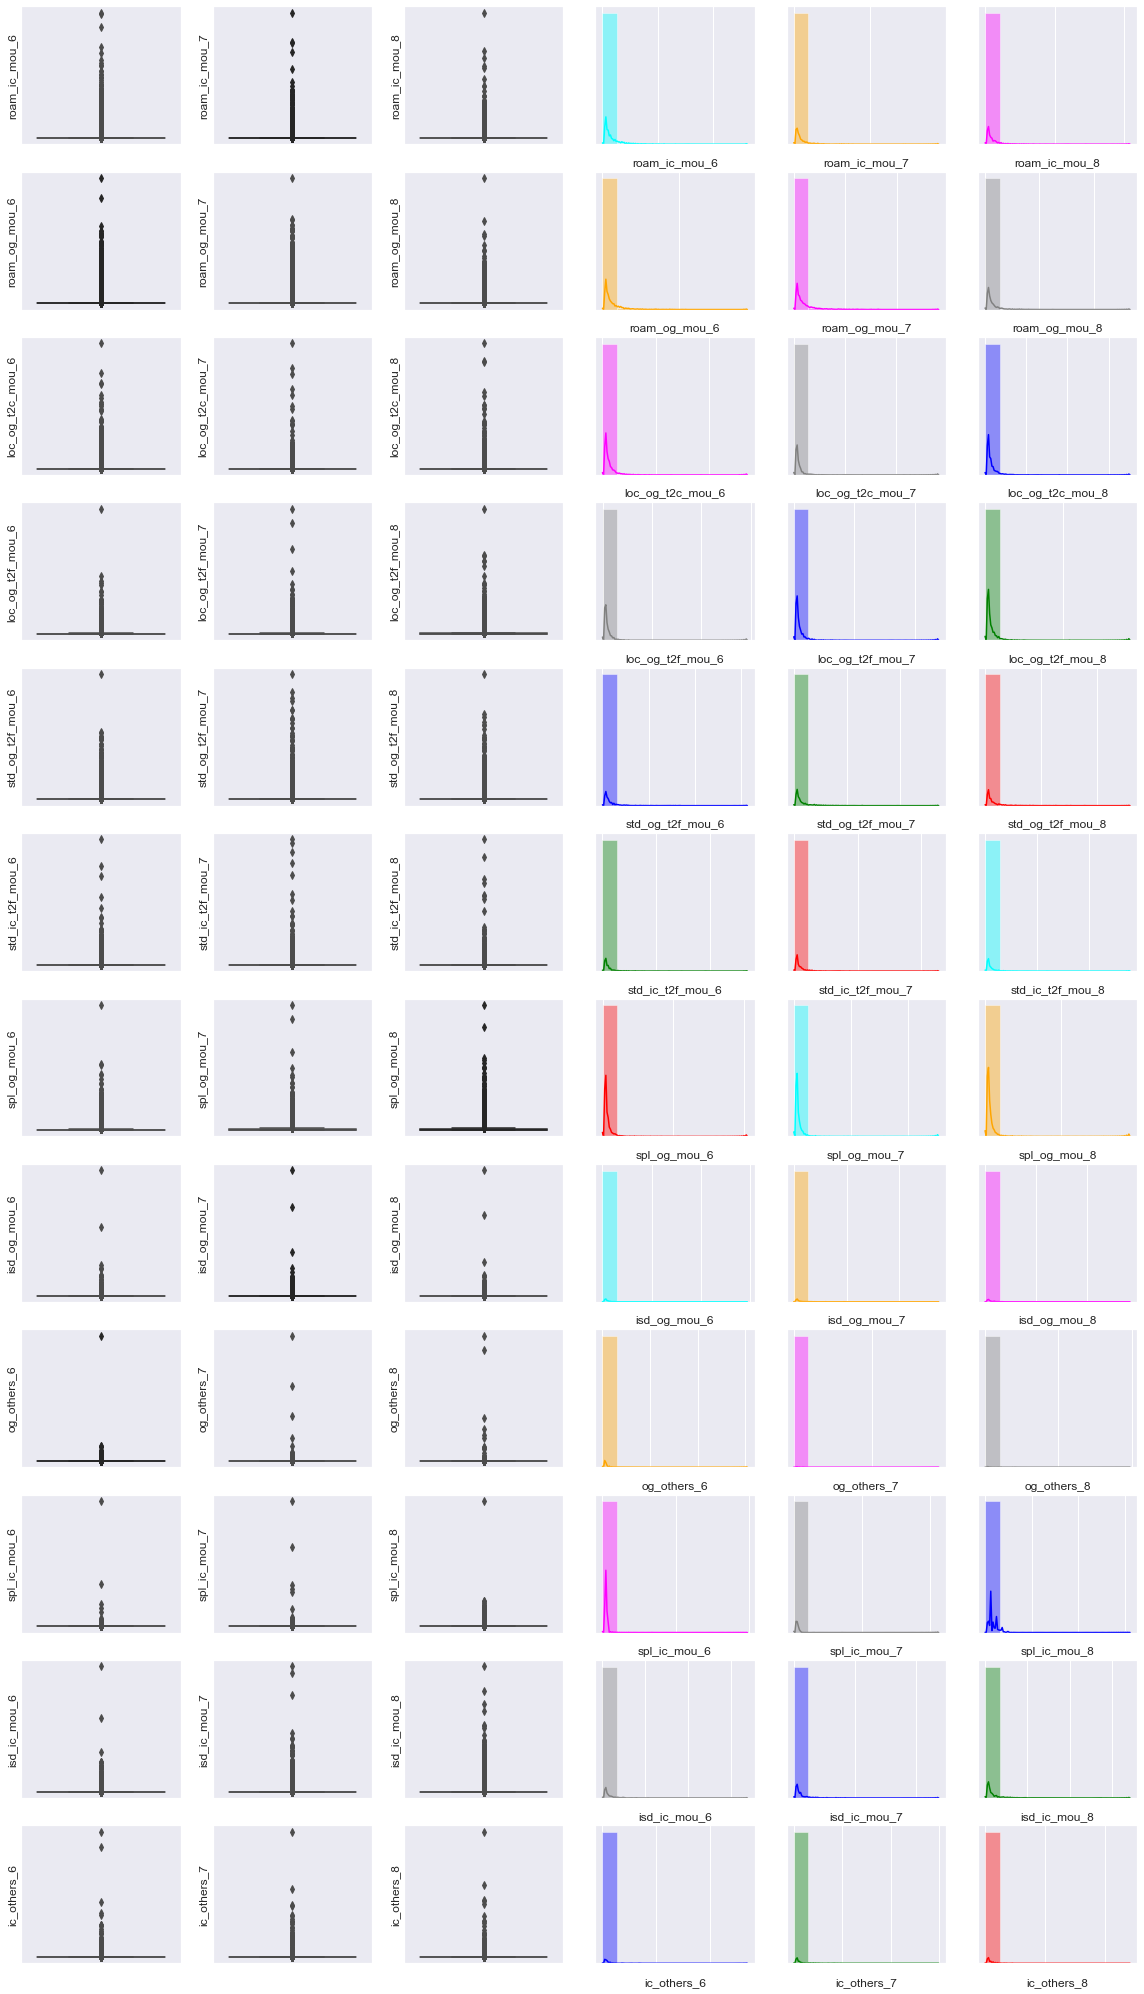

In [82]:
fig, axes = plt.subplots(12, 6, figsize=(20, 36))

i = 0; j = 0

for column in high_skew_num:
    
    ax1 = sns.boxplot(data = hvc, y = column, ax = axes[i][j], color = palette[(i + j) % 7])
    ax1.yaxis.set_major_locator(plt.NullLocator())
    ax1.xaxis.set_major_formatter(plt.NullFormatter())
    
    ax2 = sns.distplot(hvc[column], hist = True, bins = 10, ax = axes[i][j + 3], color = palette[(i + j + 3) % 7])
    ax2.yaxis.set_major_locator(plt.NullLocator())
    ax2.xaxis.set_major_formatter(plt.NullFormatter())
    
    j = j + 1
    if j == 3: j = 0; i = i + 1
        
plt.show()

In [83]:
hvc.drop(columns = high_skew_num, inplace = True)

---

## 1.7. Dealing with Outliers

From the statistics (skewness and kurtosis), it is evident that almost all the fields are having outliers. There are various ways to deal with outliers. 

 - __Trimming:__ We can remove the data points which are outliers. However, in our case, the data is imbalanced and we cannot afford to loose more data. 
 - __Flooring and Capping:__ A quantile based flooring and capping is suitable for the mou (minutes of usage) fields.
 - __Log Transformation:__ Transformation of the skewed variables also may help correct the distribution of the variables. The most common is the logarithmic transformation. This is suitable for amount based fields.

In [84]:
hvc.shape

(30001, 92)

### 1.7.1. Usage Parameters

In [85]:
usg_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 
            'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 
            'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 
            'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
            'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
            'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
            'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
            'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
            'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
            'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
            'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
            'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
            'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
            'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
            'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']

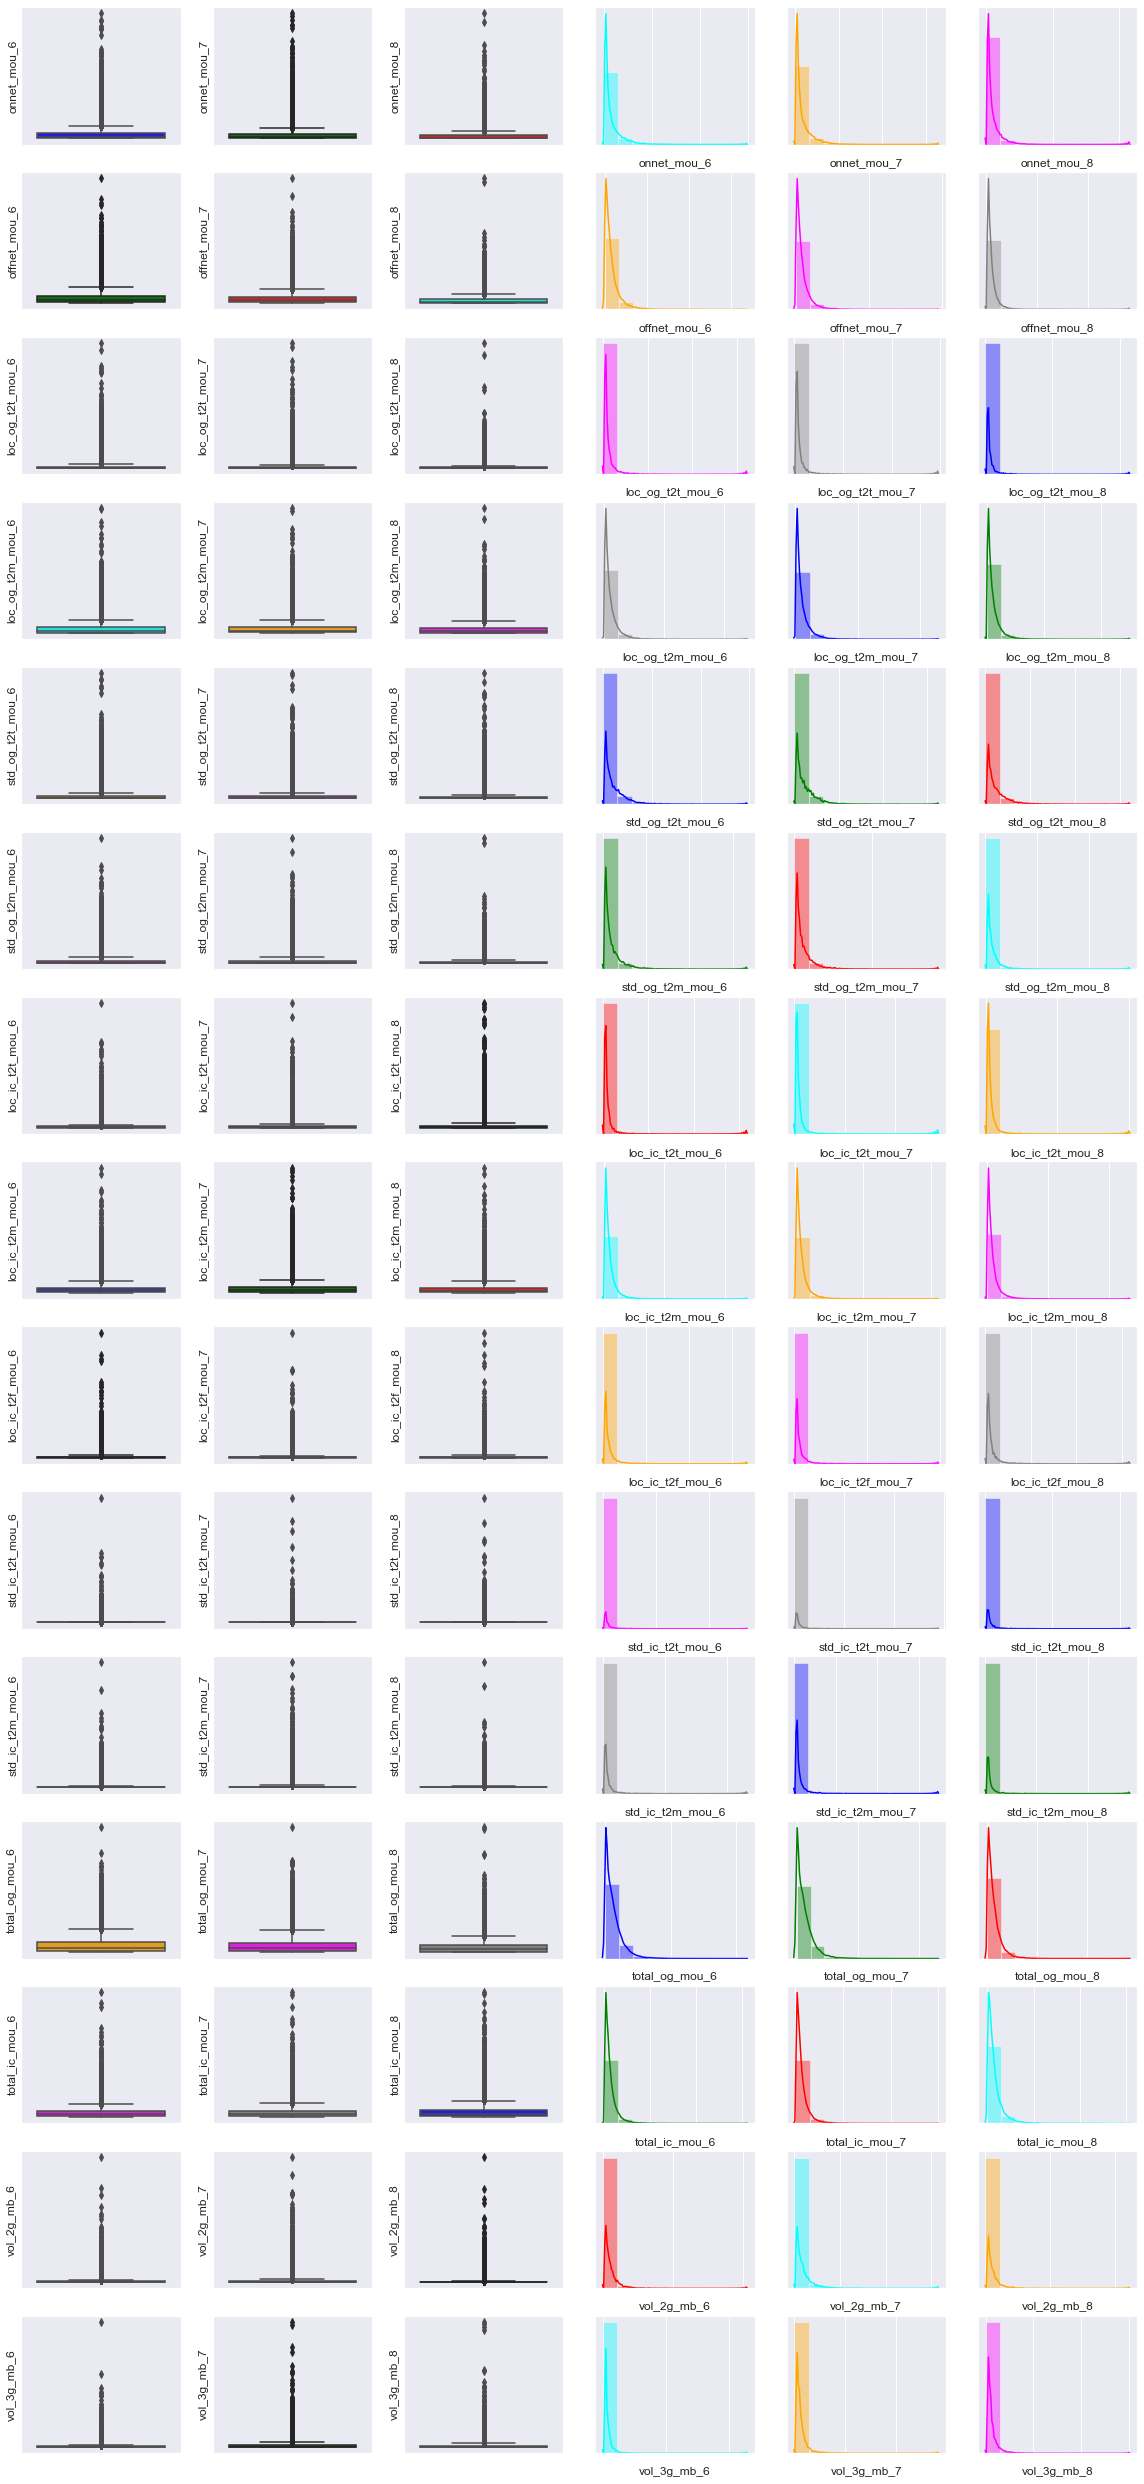

In [86]:
# Visualizing the data to spot the outliers - box plot and dist plot

fig, axes = plt.subplots(15, 6, figsize=(20, 45))

i = 0; j = 0

for column in usg_cols:
    
    ax1 = sns.boxplot(data = hvc, y = column, ax = axes[i][j], color = palette[(i + j) % 7])
    ax1.yaxis.set_major_locator(plt.NullLocator())
    ax1.xaxis.set_major_formatter(plt.NullFormatter())
    
    ax2 = sns.distplot(hvc[column], hist = True, bins = 10, ax = axes[i][j + 3], color = palette[(i + j + 3) % 7])
    ax2.yaxis.set_major_locator(plt.NullLocator())
    ax2.xaxis.set_major_formatter(plt.NullFormatter())
    
    j = j + 1
    if j == 3: j = 0; i = i + 1
        
plt.show()

In [87]:
# Usage Parameters - Capping and Flooring

for col in usg_cols:
    flr = hvc[col].quantile(0.01)
    cap = hvc[col].quantile(0.99)
    hvc[col] = np.where(hvc[col] < flr, flr, hvc[col])
    hvc[col] = np.where(hvc[col] > cap, cap, hvc[col])

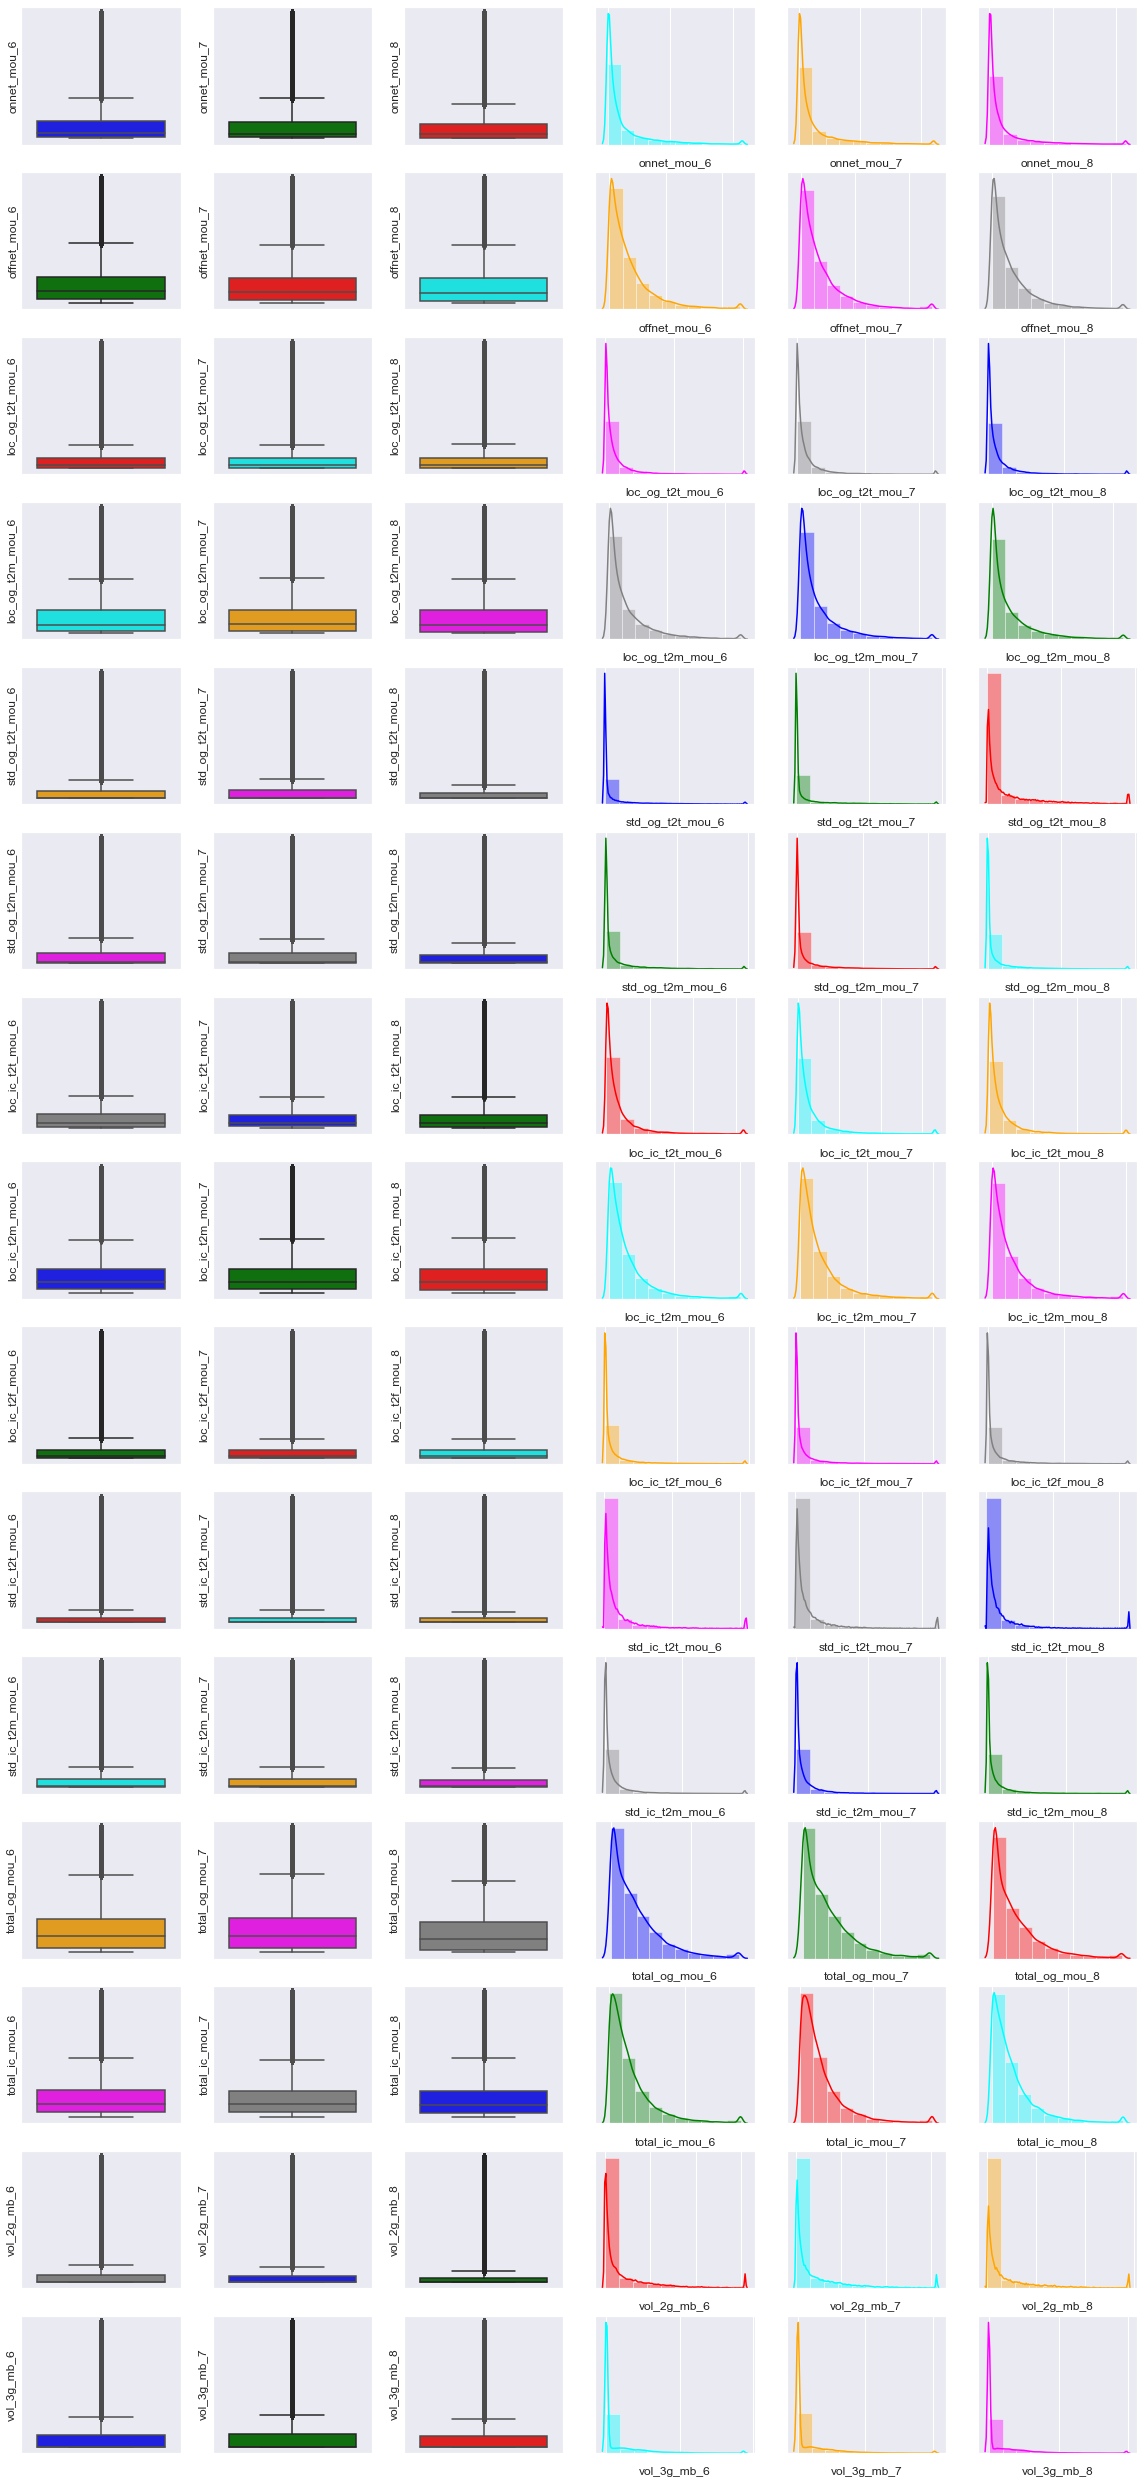

In [88]:
# Visualizing the data to spot the outliers - box plot and dist plot - after capping and flooring

fig, axes = plt.subplots(15, 6, figsize=(20, 45))

i = 0; j = 0

for column in usg_cols:
    
    ax1 = sns.boxplot(data = hvc, y = column, ax = axes[i][j], color = palette[(i + j) % 7])
    ax1.yaxis.set_major_locator(plt.NullLocator())
    ax1.xaxis.set_major_formatter(plt.NullFormatter())
    
    ax2 = sns.distplot(hvc[column], hist = True, bins = 10, ax = axes[i][j + 3], color = palette[(i + j + 3) % 7])
    ax2.yaxis.set_major_locator(plt.NullLocator())
    ax2.xaxis.set_major_formatter(plt.NullFormatter())
    
    j = j + 1
    if j == 3: j = 0; i = i + 1
        
plt.show()

### 1.7.2. Revenue Parameters

In [89]:
rev_cols = ['arpu_6', 'arpu_7', 'arpu_8', 
            'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 
            'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
            'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
            'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8',
            'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
            'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
            'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
            'vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8']

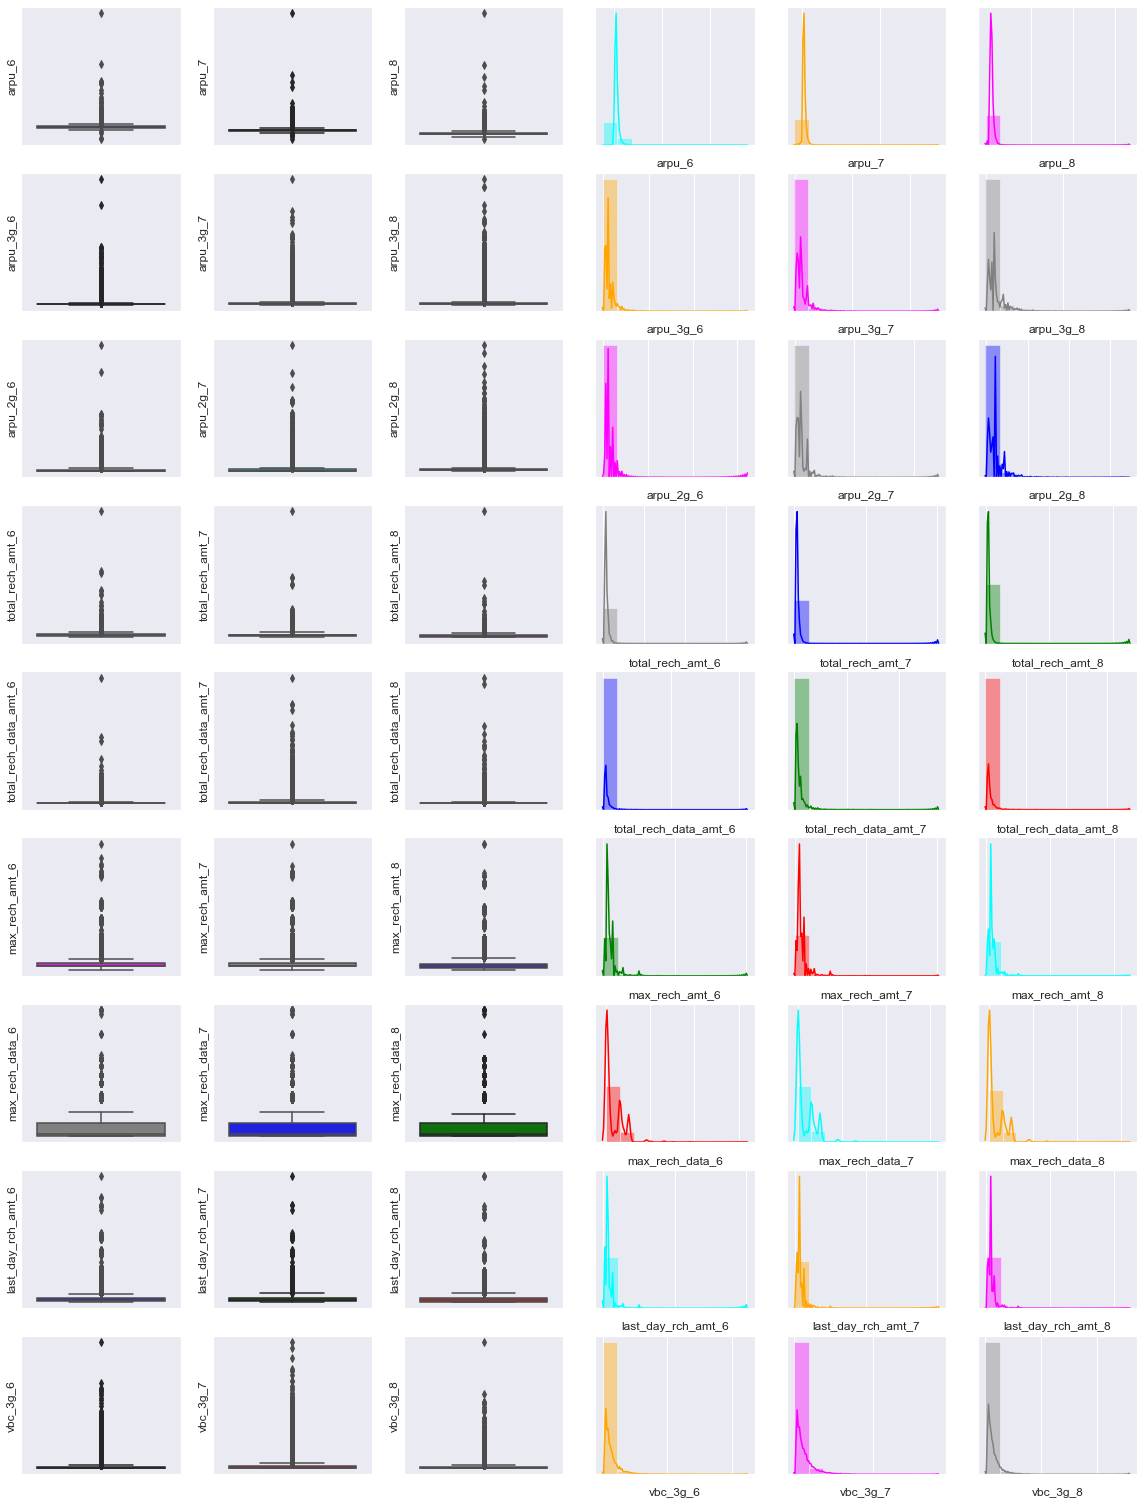

In [90]:
# Visualizing the data to spot the outliers - box plot and dist plot

fig, axes = plt.subplots(9, 6, figsize=(20, 27))

i = 0; j = 0

for column in rev_cols:
    
    ax1 = sns.boxplot(data = hvc, y = column, ax = axes[i][j], color = palette[(i + j) % 7])
    ax1.yaxis.set_major_locator(plt.NullLocator())
    ax1.xaxis.set_major_formatter(plt.NullFormatter())
    
    ax2 = sns.distplot(hvc[column], hist = True, bins = 10, ax = axes[i][j + 3], color = palette[(i + j + 3) % 7])
    ax2.yaxis.set_major_locator(plt.NullLocator())
    ax2.xaxis.set_major_formatter(plt.NullFormatter())
    
    j = j + 1
    if j == 3: j = 0; i = i + 1
        
plt.show()

In [91]:
# Revenue Parameters - Log Transformation

for col in rev_cols: hvc[col] = hvc[col].map(lambda i: np.log(i) if i > 0 else 0)

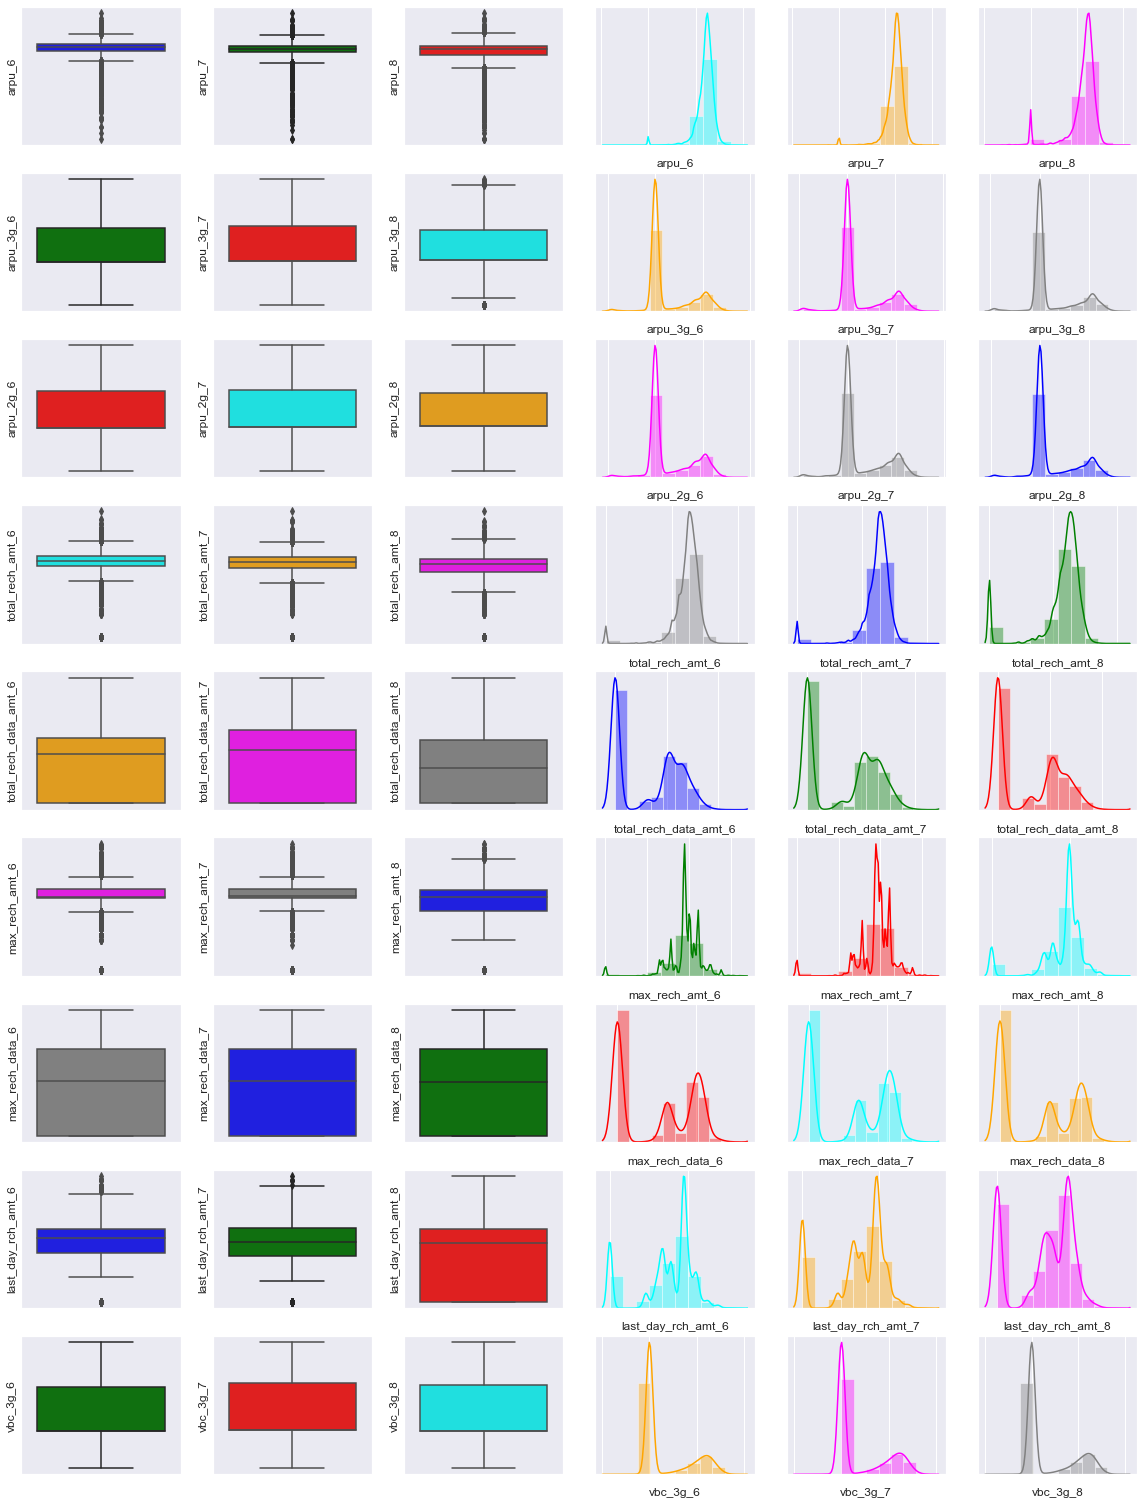

In [92]:
# Visualizing the data to spot the outliers - box plot and dist plot

fig, axes = plt.subplots(9, 6, figsize=(20, 27))

i = 0; j = 0

for column in rev_cols:
    
    ax1 = sns.boxplot(data = hvc, y = column, ax = axes[i][j], color = palette[(i + j) % 7])
    ax1.yaxis.set_major_locator(plt.NullLocator())
    ax1.xaxis.set_major_formatter(plt.NullFormatter())
    
    ax2 = sns.distplot(hvc[column], hist = True, bins = 10, ax = axes[i][j + 3], color = palette[(i + j + 3) % 7])
    ax2.yaxis.set_major_locator(plt.NullLocator())
    ax2.xaxis.set_major_formatter(plt.NullFormatter())
    
    j = j + 1
    if j == 3: j = 0; i = i + 1
        
plt.show()

### 1.7.3. Other Discrete Parameters

In [93]:
discrete = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8', 
            'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8', 
            'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
            'last_rech_6', 'last_rech_7', 'last_rech_8',
            'last_rech_data_6', 'last_rech_data_7', 'last_rech_data_8',
            'fb_user_6', 'fb_user_7', 'fb_user_8']

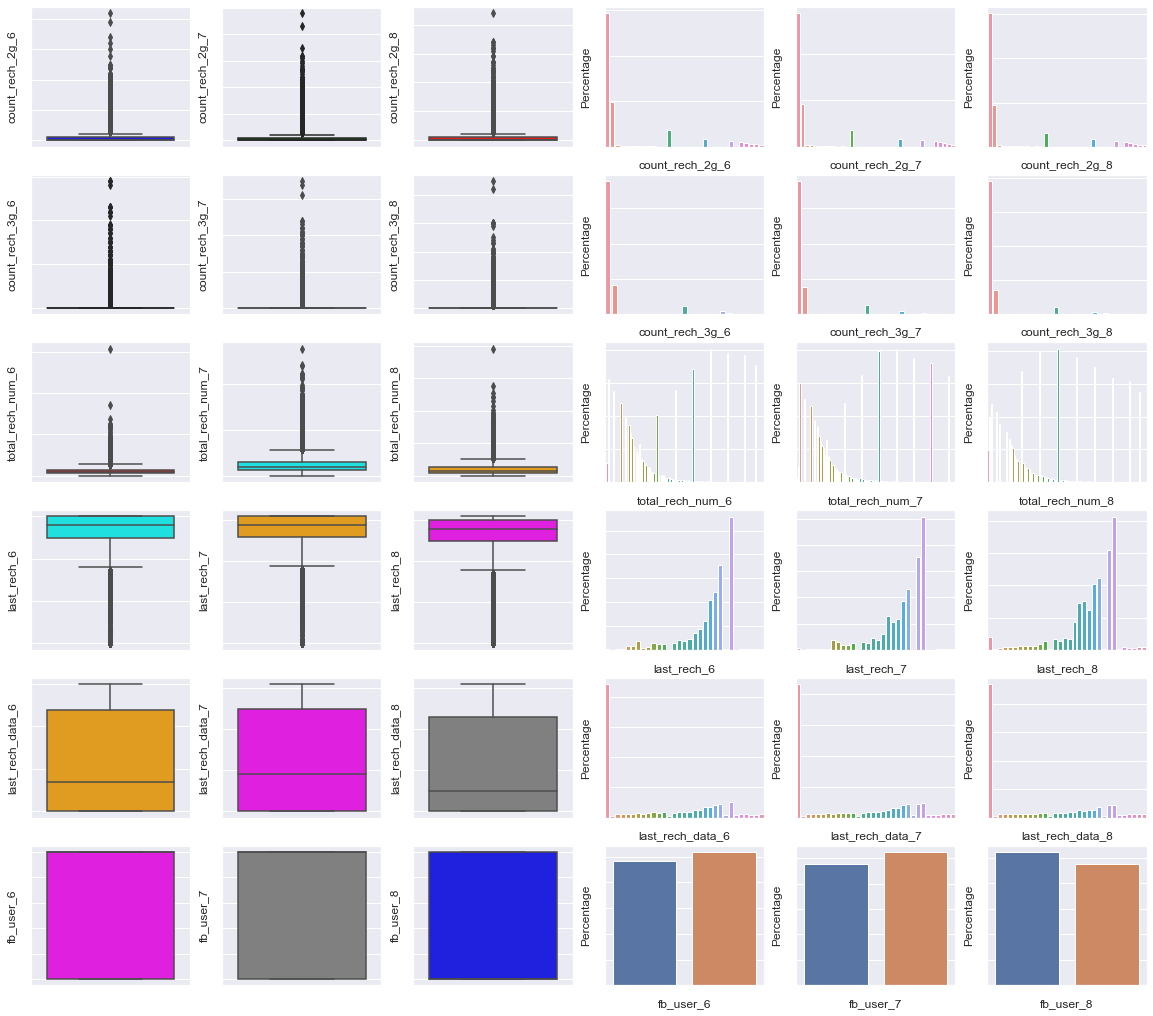

In [94]:
fig, axes = plt.subplots(6, 6, figsize=(20, 18))

i = 0; j = 0

for column in discrete:
    
    levels = hvc[column].astype('str').value_counts().reset_index()
    levels.rename(columns = {'index' : column, column : 'Count'}, inplace = True)
    levels['Percentage'] = round((levels['Count'] / len(hvc.index) * 100), 2)
    levels.sort_values(by = 'Count', ascending = False)
    ax = sns.barplot(data = levels, x = column, y = 'Percentage', ax = axes[i][j + 3])
    ax.set(xticklabels=[]); ax.set(yticklabels=[])
    
    ax = sns.boxplot(data = hvc, y = column, ax = axes[i][j], color = palette[(i + j) % 7])
    ax.set(xticklabels=[]); ax.set(yticklabels=[])
    
    j = j + 1
    if j == 3: i = i + 1; j = 0
    
plt.show()

---

## 1.8. Data Visualization - Bivariate Analysis

In [328]:
%matplotlib inline

### 1.8.1. Check for Multicollinearity

In [96]:
correlation = hvc.corr().abs()

In [97]:
correlation = correlation.where(np.triu(np.ones(correlation.shape), k = 1).astype(np.bool))

(92.0, 0.0)

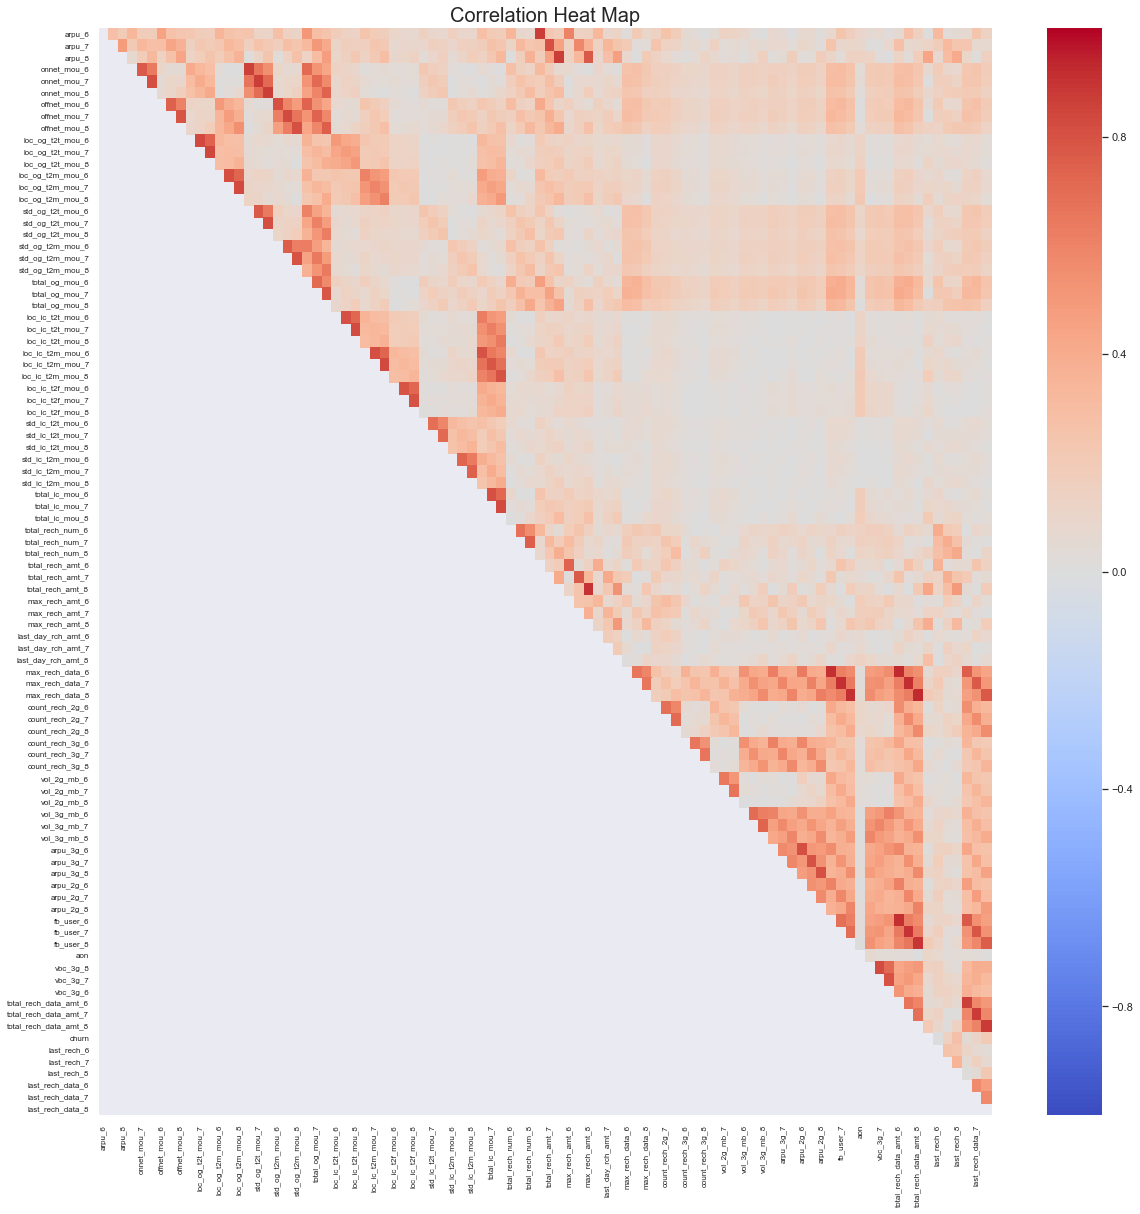

In [98]:
# plot correlation heat map for numeric variables

f, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(correlation, vmin = -1, vmax = 1, cmap = "coolwarm", annot = False, annot_kws = {"size": 8})

heatmap.set_yticklabels(heatmap.get_yticklabels(), size = 8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size = 8)

# add title to the plot
ax.set_title('Correlation Heat Map', fontsize = 20)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# due to a bug in seaborn the first and last row square are getting cut in half - the following code fixes it
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [99]:
highcorrind = np.where(correlation > 0.85)
highcorrpair = [(correlation.index[x], correlation.columns[y]) for x, y in zip(*highcorrind) if x != y and x < y]

In [100]:
highcorrpair

[('arpu_6', 'total_rech_amt_6'),
 ('arpu_8', 'total_rech_amt_8'),
 ('onnet_mou_6', 'std_og_t2t_mou_6'),
 ('onnet_mou_7', 'std_og_t2t_mou_7'),
 ('onnet_mou_8', 'std_og_t2t_mou_8'),
 ('total_rech_amt_8', 'max_rech_amt_8'),
 ('max_rech_data_6', 'fb_user_6'),
 ('max_rech_data_6', 'total_rech_data_amt_6'),
 ('max_rech_data_7', 'fb_user_7'),
 ('max_rech_data_7', 'total_rech_data_amt_7'),
 ('max_rech_data_8', 'fb_user_8'),
 ('max_rech_data_8', 'total_rech_data_amt_8'),
 ('fb_user_6', 'total_rech_data_amt_6'),
 ('fb_user_7', 'total_rech_data_amt_7'),
 ('fb_user_8', 'total_rech_data_amt_8'),
 ('total_rech_data_amt_6', 'last_rech_data_6'),
 ('total_rech_data_amt_7', 'last_rech_data_7'),
 ('total_rech_data_amt_8', 'last_rech_data_8')]

### 1.8.2. Studying the Relationship between Call Usage (mou) and Recharge Amount

In [323]:
call = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 
        'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
        'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'churn']

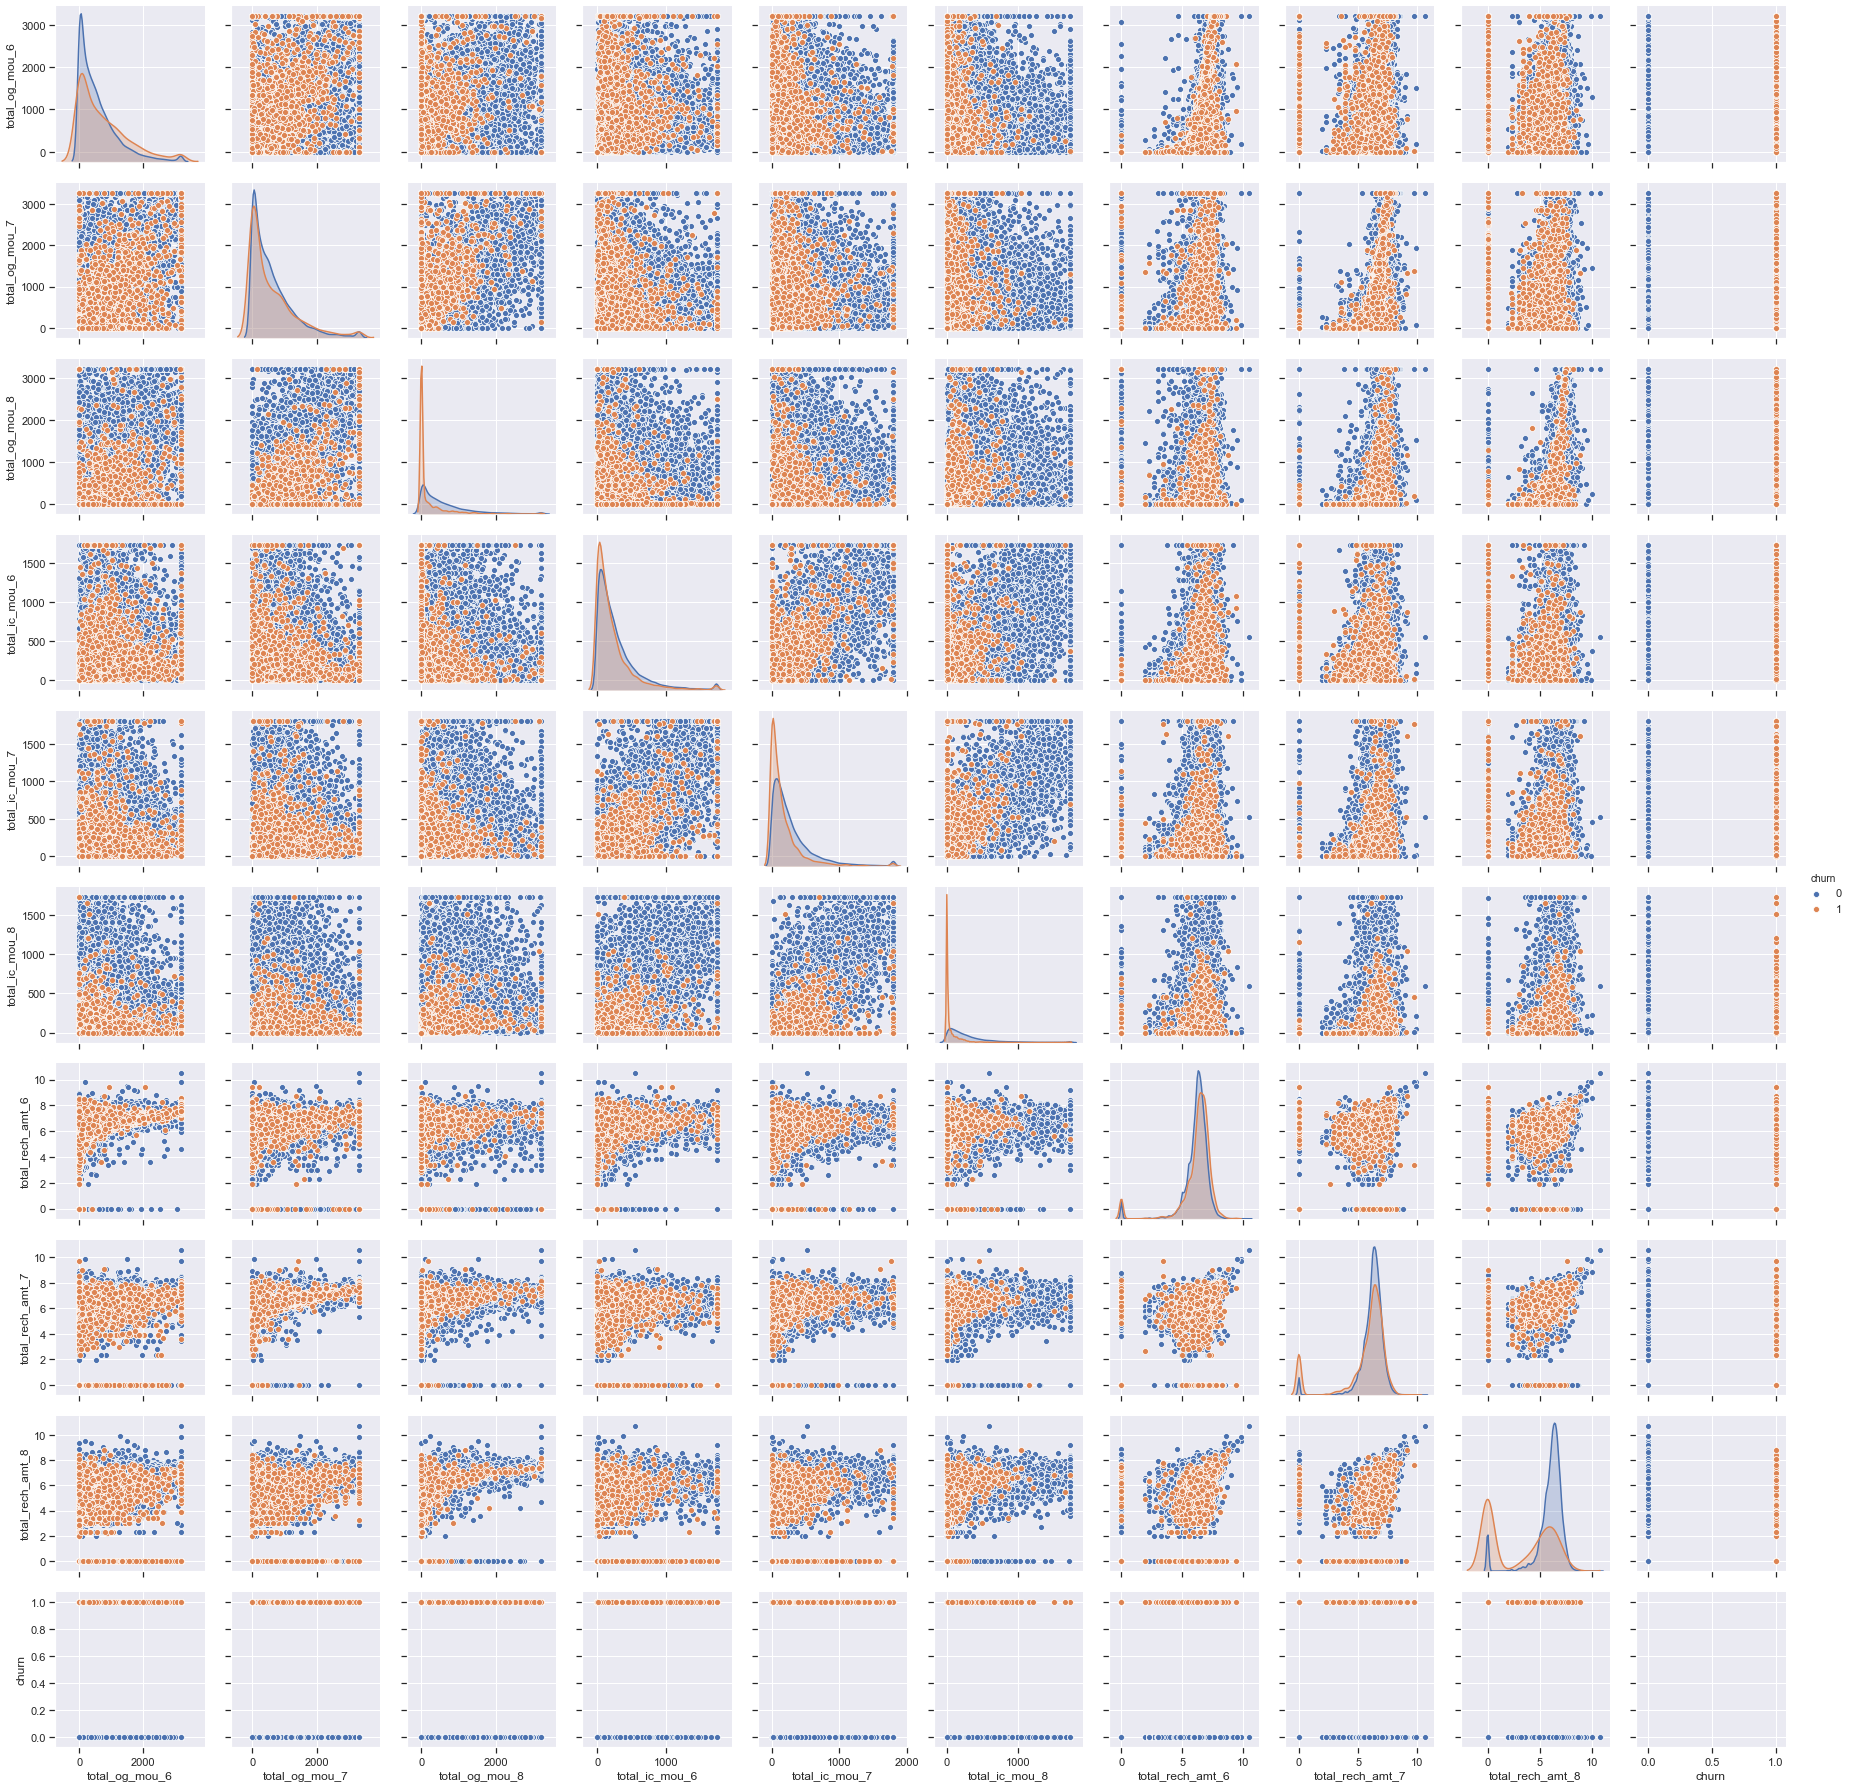

In [324]:
sns.pairplot(data = hvc[call], hue = 'churn')

### 1.8.3. Studying the Relationship between Data Usage and Recharge Amount

In [326]:
data = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
        'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 
        'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8', 'churn']

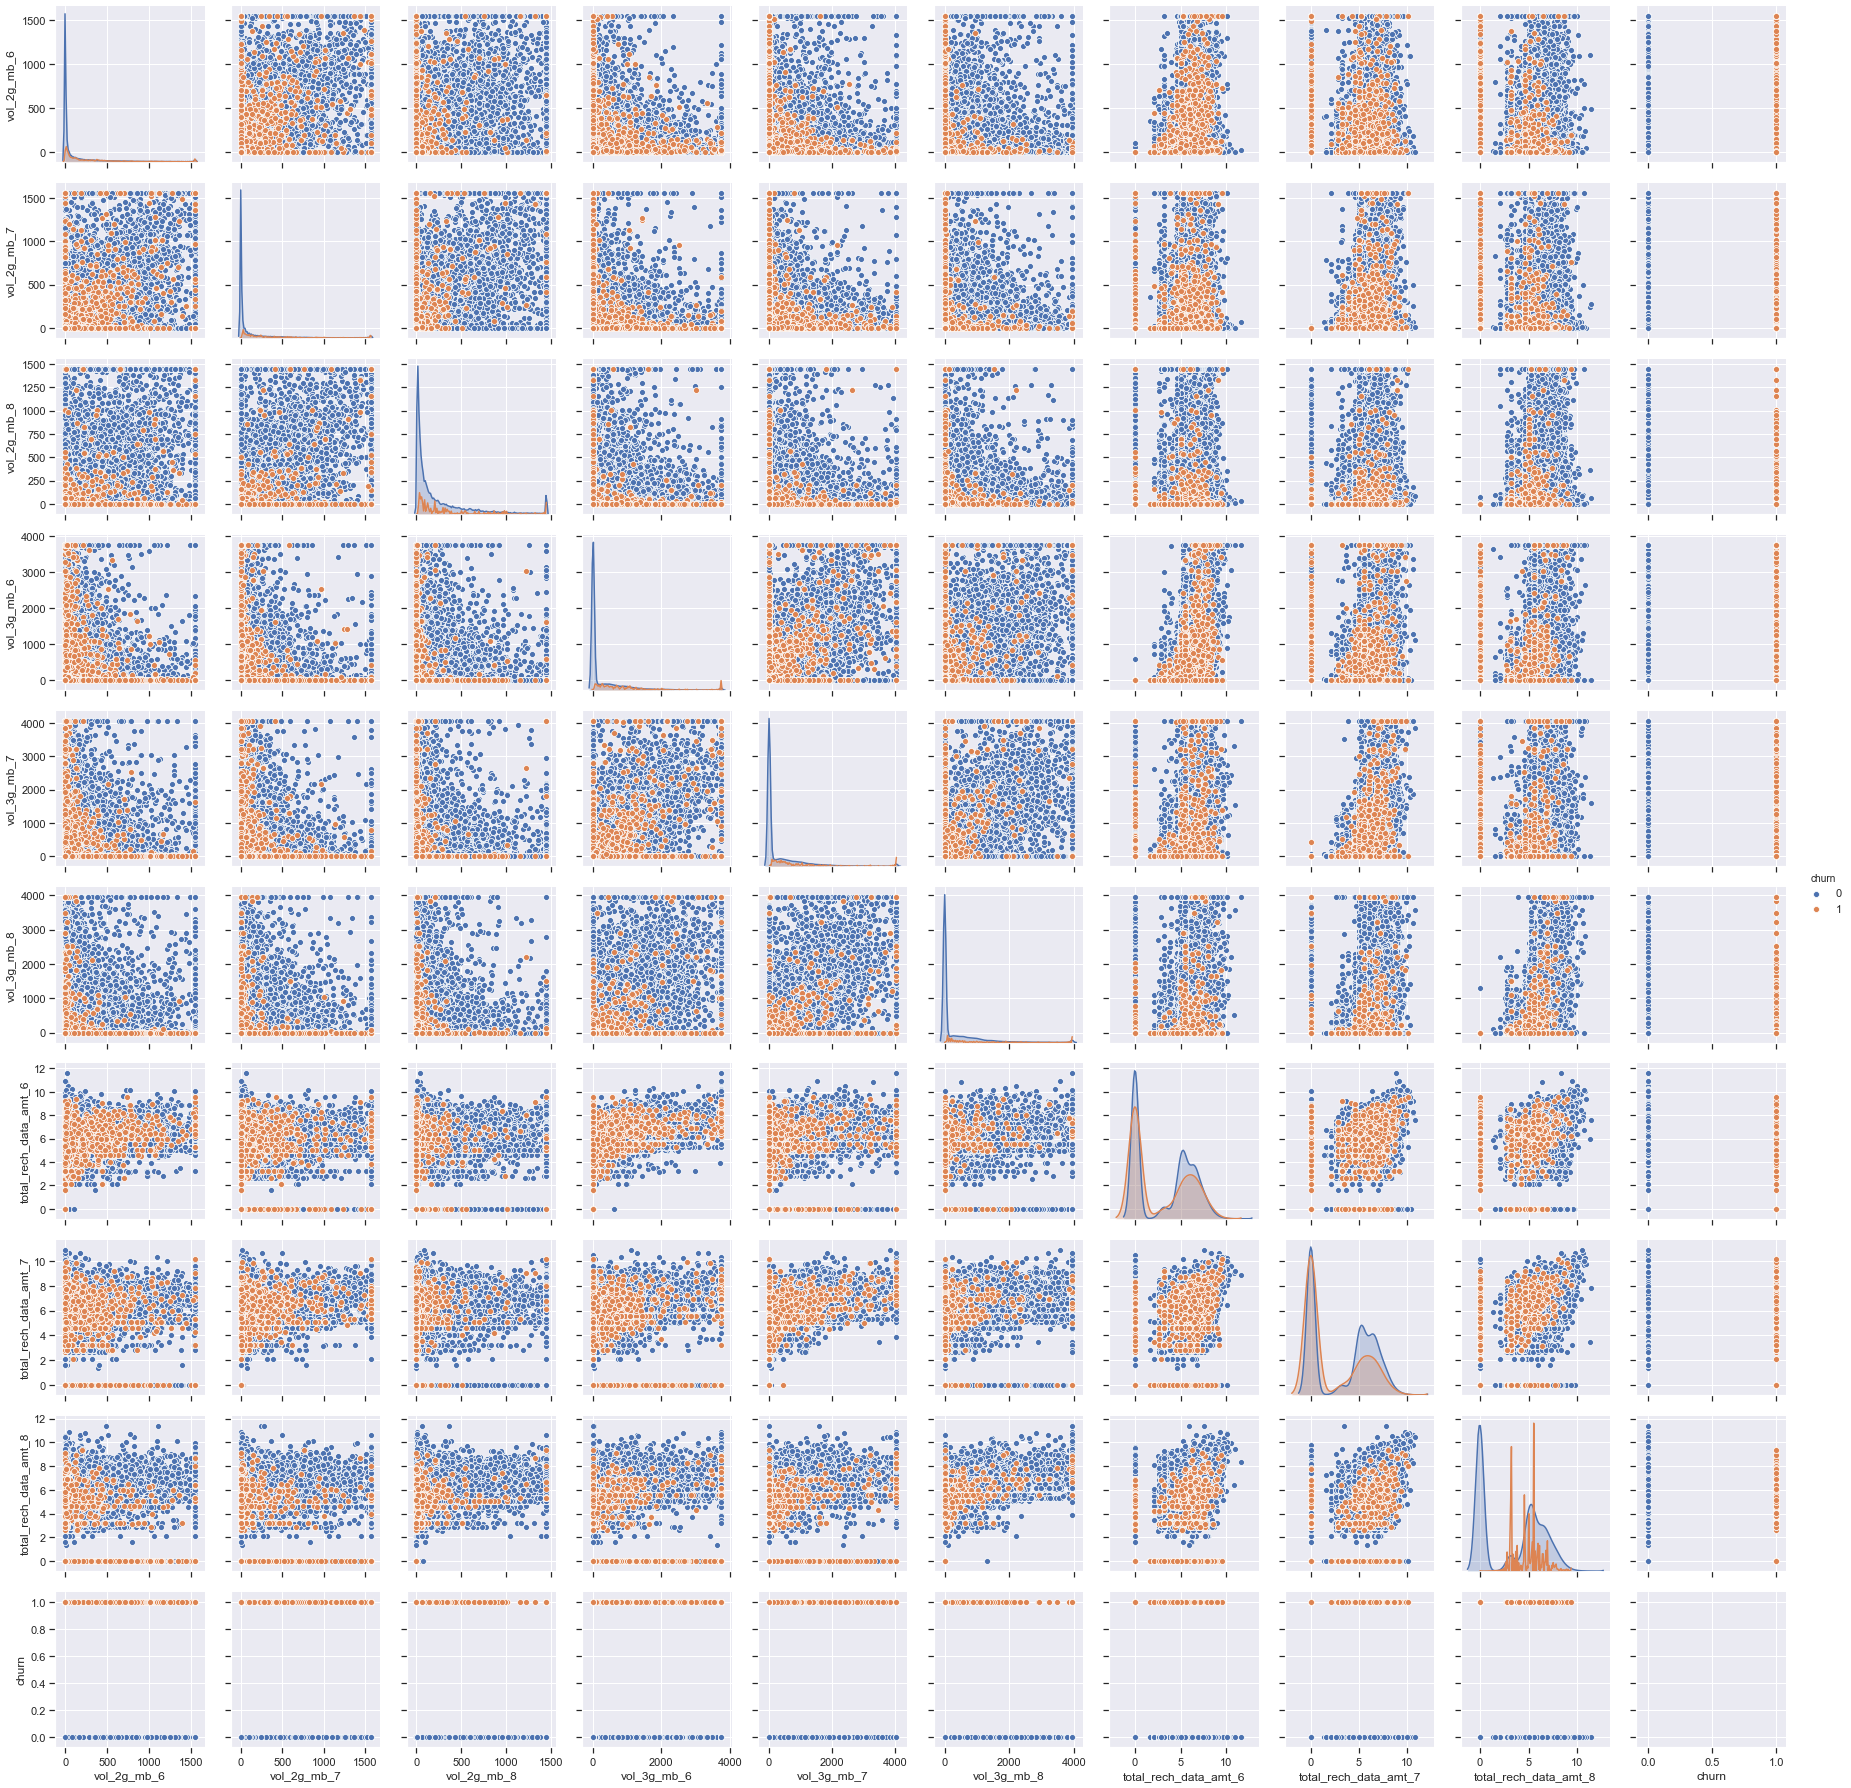

In [327]:
sns.pairplot(data = hvc[data], hue = 'churn')

We see a very interesting pattern when we see the call usage and data usage against the corresponding recharge amount. We can clearly see a reduction in the usage - we see the orange dots shrinking towards the axis - be it the usage of calls (incoming, outgoing) or data (2g or 3g). A reduction in usage is a clear indicator of the churn. We do not see such changes in the amount pattern. So going by the revenue may not be a right choice. 

## Summary

We started with the telecom data set that had **99999 rows** and **226 columns**. As a first step we **filtered the data of high value customers.** High value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). We got 29953 records. Then we **created the target variable - churn** and tagged the customers to churn (1) or no churn (0) category. 26698 customers are in no churn (0) category and 3255 are in churn (1) category. Thus we saw that there is an imbalance in data. 

In the process of data preparation, we have also removed certain columns.

 - **Removed 53 variables connected to the churn period data.**
 - **Dropped 9 date columns** - The date columns are converted to days (last_rech_m, last_rech_data_m) before dropping the columns last_date_of_month_m, date_of_last_rech_m, date_of_last_rech_data_m.  
 - **Dropped 12 dependent variables** (columns that can be expressed as a sum of certain other fields) loc_og_mou_m, std_og_mou_m, loc_ic_mou_m, std_ic_mou_m.
 - **Dropped 10 columns without any variability.** circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_m, std_ic_t2o_mou_m
 - **Dropped 51 columns which are highly skewed.** (monthly_2g_m, monthly_3g_m, sachet_2g_m, sachet_3g_m, night_pck_user_m, roam_ic_mou_m, roam_og_mou_m, loc_og_t2c_mou_m, loc_og_t2f_mou_m, std_og_t2f_mou_m, std_ic_t2f_mou_m, spl_og_mou_m, isd_og_mou_m, og_others_m, spl_ic_mou_m, isd_ic_mou_m, ic_others_m)

**Derived features** total_rech_data_amt_m = total_rech_data_m * av_rech_amt_data_m. Dropped the columns used for deriving the features. Also created 6 derived features based on dates. We have **handled the null values** by appropriate data imputation. We have also **handled the outliers and skewness** in data. For usage parameters, we have used capping and flooring. For revenue parameters, we have used logarithmic transformation.

Mobile number is unique. We have set it as the index of the data frame. Finally we have 92 columns. 

In [101]:
hvc.shape

(30001, 92)

---

# 2. Model Building and Evaluation

## 2.1. Data Preprocessing

### 2.1.1. Test Train Split

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = hvc.drop(['churn'], axis = 1)
y = hvc['churn']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### 2.1.2. Handling Data Imbalance

In [105]:
hvc['churn'].value_counts() 

0    27560
1     2441
Name: churn, dtype: int64

92% of the records are with churn = 0 and 8 % of records have churn = 1. We have to reconstruct the data to address this imbalance. **SMOTE** (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [106]:
from imblearn.over_sampling import SMOTE 

In [107]:
sm = SMOTE(random_state = 2) 

In [108]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [109]:
X_train_res.shape

(38618, 91)

In [110]:
print('After SMOTE, count of churn = 1 is', sum(y_train_res == 1))
print('After SMOTE, count of churn = 0 is', sum(y_train_res == 0))

After SMOTE, count of churn = 1 is 19309
After SMOTE, count of churn = 0 is 19309


### 2.1.3. Scaling the Features

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [113]:
X_train_res = pd.DataFrame(scaler.fit_transform(X_train_res), columns = X_train_res.columns)

In [114]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

---

## 2.2. Principal Component Analysis (PCA)

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(svd_solver = 'randomized', random_state = 42)

In [117]:
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [118]:
pca.components_

array([[-6.42433080e-02, -4.27902262e-02,  2.32355561e-02, ...,
         1.69395011e-01,  1.79648012e-01,  1.55470096e-01],
       [ 7.67450433e-02,  1.71396114e-01,  2.07378570e-01, ...,
        -2.21856828e-02,  3.17715752e-02,  8.78852576e-02],
       [ 8.50844295e-02, -1.17724235e-01, -1.31271585e-01, ...,
         5.91993308e-03, -8.44490828e-02, -9.66873976e-02],
       ...,
       [-2.45181305e-03,  1.23074137e-02, -1.50889219e-02, ...,
         8.81933339e-03, -2.61386025e-02,  1.54927777e-02],
       [ 8.49953907e-03, -3.07509274e-04, -1.51089381e-02, ...,
         1.07774157e-02, -8.49629426e-03,  7.98516572e-03],
       [ 2.76912303e-03, -7.77886419e-04, -1.68112203e-03, ...,
         3.79992485e-05,  6.45385509e-04,  7.00585960e-04]])

In [119]:
colnames = list(X_train_res.columns)

In [120]:
pcadf = pd.DataFrame({'PC1' : pca.components_[0], 'PC2' : pca.components_[1], 'Feature' : colnames})

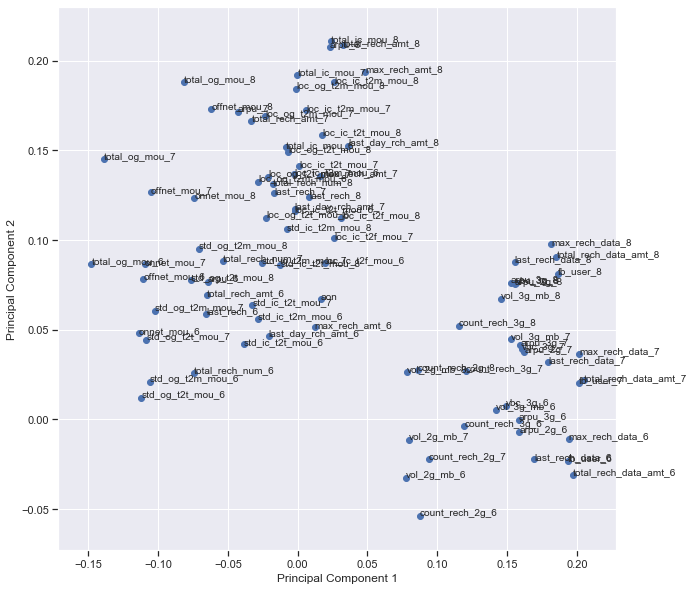

In [121]:
fig = plt.figure(figsize = (10, 10))

plt.scatter(pcadf.PC1, pcadf.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(pcadf.Feature): plt.annotate(txt, (pcadf.PC1[i], pcadf.PC2[i]))

plt.show()

In [122]:
pca.explained_variance_ratio_

array([1.76455376e-01, 1.35264659e-01, 7.13578784e-02, 5.38484438e-02,
       4.63611338e-02, 4.37949694e-02, 3.45876169e-02, 3.04392125e-02,
       2.68933802e-02, 2.50684430e-02, 2.45223386e-02, 2.09256240e-02,
       1.82613518e-02, 1.74020959e-02, 1.53796814e-02, 1.35497383e-02,
       1.29372119e-02, 1.17892281e-02, 1.05590026e-02, 9.95292638e-03,
       9.57937881e-03, 9.18202980e-03, 8.97106526e-03, 8.47201202e-03,
       8.40231005e-03, 7.88127601e-03, 7.75421691e-03, 7.43013407e-03,
       7.03898172e-03, 6.96212297e-03, 6.50113041e-03, 5.83014044e-03,
       5.71749793e-03, 5.30430653e-03, 5.21792386e-03, 4.65880641e-03,
       4.54258038e-03, 4.19281146e-03, 3.69924122e-03, 3.61080537e-03,
       3.43039808e-03, 3.32174518e-03, 3.31386634e-03, 3.18224288e-03,
       2.99662514e-03, 2.94836707e-03, 2.88081054e-03, 2.67012333e-03,
       2.49811414e-03, 2.47160018e-03, 2.36336468e-03, 2.35875906e-03,
       2.24396078e-03, 2.14639264e-03, 2.07113146e-03, 1.97907452e-03,
      

In [123]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17645538, 0.31172003, 0.38307791, 0.43692636, 0.48328749,
       0.52708246, 0.56167008, 0.59210929, 0.61900267, 0.64407111,
       0.66859345, 0.68951908, 0.70778043, 0.72518252, 0.7405622 ,
       0.75411194, 0.76704915, 0.77883838, 0.78939739, 0.79935031,
       0.80892969, 0.81811172, 0.82708279, 0.8355548 , 0.84395711,
       0.85183838, 0.8595926 , 0.86702273, 0.87406172, 0.88102384,
       0.88752497, 0.89335511, 0.89907261, 0.90437691, 0.90959484,
       0.91425364, 0.91879623, 0.92298904, 0.92668828, 0.93029908,
       0.93372948, 0.93705123, 0.94036509, 0.94354734, 0.94654396,
       0.94949233, 0.95237314, 0.95504326, 0.95754138, 0.96001298,
       0.96237634, 0.9647351 , 0.96697906, 0.96912545, 0.97119658,
       0.97317566, 0.9750123 , 0.97673288, 0.97840419, 0.98004798,
       0.9816393 , 0.98310843, 0.9845547 , 0.98595465, 0.98723528,
       0.98850215, 0.98972641, 0.99091227, 0.992061  , 0.99313149,
       0.99414023, 0.99504844, 0.99569306, 0.99631393, 0.99687

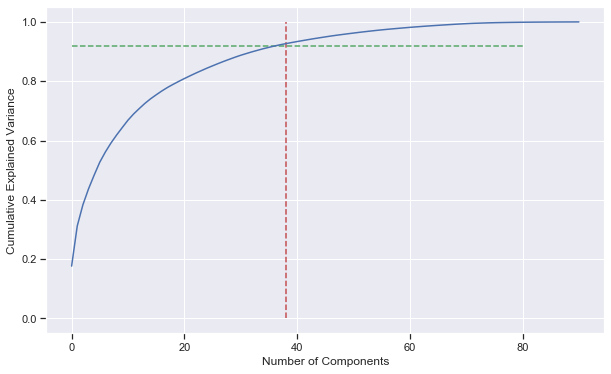

In [124]:
%matplotlib inline

fig = plt.figure(figsize = (10, 6))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.vlines(x = 38, ymin = 0, ymax = 1, colors = "r", linestyle = '--')
plt.hlines(y = 0.92, xmin = 0, xmax = 80, colors = "g", linestyle = '--')

plt.show()

In [125]:
from sklearn.decomposition import IncrementalPCA

In [126]:
pca_final = IncrementalPCA(n_components = 38)

In [127]:
X_train_pca = pd.DataFrame(pca_final.fit_transform(X_train_res))

In [128]:
correlation = X_train_pca.corr()

(37.0, 0.0)

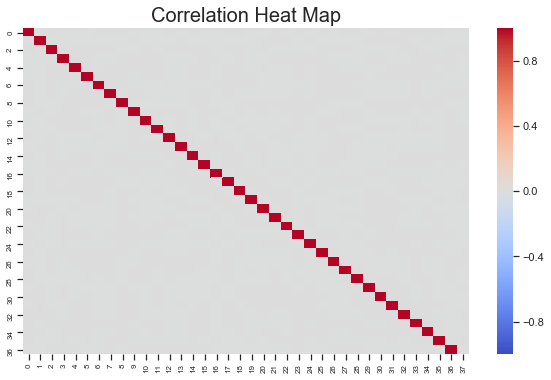

In [129]:
# plot correlation heat map for numeric variables

f, ax = plt.subplots(figsize=(10, 6))

heatmap = sns.heatmap(correlation, vmin = -1, vmax = 1, cmap = "coolwarm", annot = False, annot_kws = {"size": 8})

heatmap.set_yticklabels(heatmap.get_yticklabels(), size = 8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size = 8)

# add title to the plot
ax.set_title('Correlation Heat Map', fontsize = 20)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# due to a bug in seaborn the first and last row square are getting cut in half - the following code fixes it
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [130]:
X_test_pca = pca_final.transform(X_test)

---

In [131]:
parameters = pd.DataFrame(columns = ['Model', 'TP', 'FP', 'TN', 'FN',
                                     'Accuracy', 'Sensitivity', 'Specificity', 
                                     'Precision', 'Recall',
                                     'FPR', 'PPV', 'NPV', 'AUC'])

In [132]:
# function to plot the ROC

def draw_roc(actual, probs):
    
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(10, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Plot')
    plt.legend(loc="lower right")
    plt.show()

    return None

---

### 2.2.1. Logistic Regression on PCA Dataset

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [134]:
lr = LogisticRegression()

In [135]:
lr.fit(X_train_pca, y_train_res)

LogisticRegression()

In [136]:
y_pred = lr.predict(X_test_pca)

In [137]:
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.8551272080879903


In [138]:
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

(2.0, 0.0)

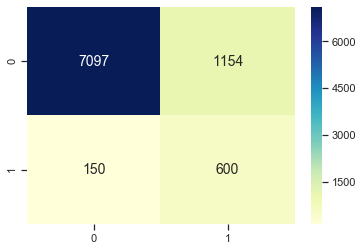

In [139]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [140]:
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [141]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.8551272080879903
Sensitivity               :  0.8
Specificity               :  0.8601381650709005
False Positive Rate       :  0.1398618349290995
Positive Predictive Value :  0.34207525655644244
Negative Predictive Value :  0.9793017800469159
Precision                 :  0.34207525655644244
Recall                    :  0.8


In [142]:
probability = lr.predict_proba(X_test_pca)[:, 1]

In [143]:
AUC = roc_auc_score(y_test, probability)

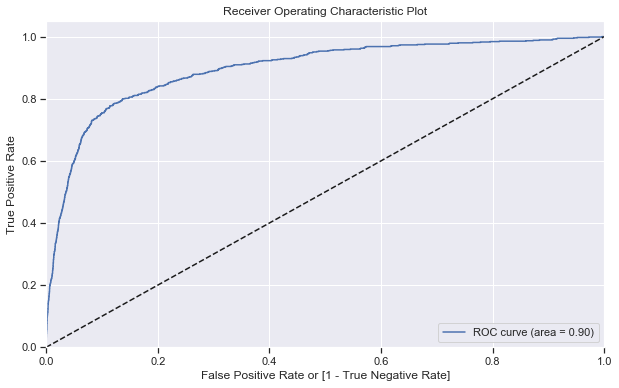

In [144]:
draw_roc(y_test, probability)

In [145]:
p, r, thresholds = precision_recall_curve(y_test, probability)

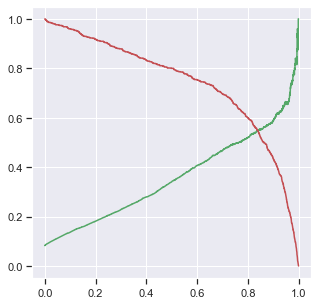

In [146]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

In [147]:
parameters = parameters.append({'Model' : 'Logistic Regression on PCA Dataset', 
                                'TP' : TP, 'FP' : FP, 'TN' : TN, 'FN' : FN,
                                'Accuracy' : Accuracy, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 
                                'Precision' : Precision, 'Recall' : Recall,
                                'FPR' : FPR, 'PPV' : PPV, 'NPV' : NPV, 'AUC' : AUC}, ignore_index = True)

---

### 2.2.2. Decision Tree on PCA Dataset

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dt = DecisionTreeClassifier()

In [150]:
dt.fit(X_train_pca, y_train_res)

DecisionTreeClassifier()

In [151]:
y_pred = dt.predict(X_test_pca)

In [152]:
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

(2.0, 0.0)

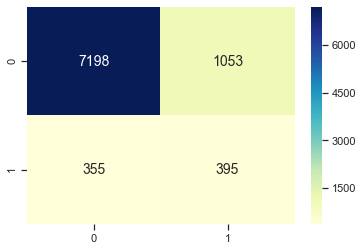

In [153]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [154]:
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [155]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.8435729363404066
Sensitivity               :  0.5266666666666666
Specificity               :  0.872379105562962
False Positive Rate       :  0.12762089443703795
Positive Predictive Value :  0.27279005524861877
Negative Predictive Value :  0.9529988084204951
Precision                 :  0.27279005524861877
Recall                    :  0.5266666666666666


In [156]:
probability = dt.predict_proba(X_test_pca)[:, 1]

In [157]:
AUC = roc_auc_score(y_test, probability)

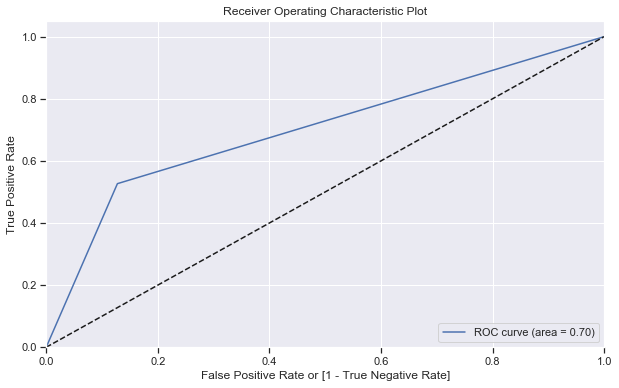

In [158]:
draw_roc(y_test, probability)

In [159]:
p, r, thresholds = precision_recall_curve(y_test, probability)

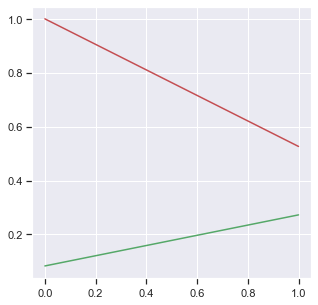

In [160]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

In [161]:
parameters = parameters.append({'Model' : 'Decision Tree on PCA Dataset', 
                                'TP' : TP, 'FP' : FP, 'TN' : TN, 'FN' : FN,
                                'Accuracy' : Accuracy, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 
                                'Precision' : Precision, 'Recall' : Recall,
                                'FPR' : FPR, 'PPV' : PPV, 'NPV' : NPV, 'AUC' : AUC}, ignore_index = True)

---

### 2.2.3. Hyperparameter Tuning for Decision Tree

In [162]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [163]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

In [164]:
# Instantiate the grid search model

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           cv = n_folds, 
                           verbose = 1,
                           n_jobs=-1,
                           scoring='recall')

In [165]:
# Fit the grid search to the data

grid_search.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   33.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [166]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [167]:
scores = grid_search.cv_results_

In [168]:
dt = DecisionTreeClassifier(max_depth = 10,
                            min_samples_leaf = 50,
                            min_samples_split = 50,
                            criterion = 'gini')

In [169]:
dt.fit(X_train_pca, y_train_res)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

In [170]:
y_pred = dt.predict(X_test_pca)

In [171]:
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

(2.0, 0.0)

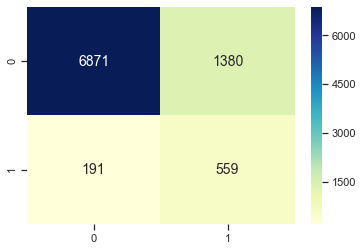

In [172]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [173]:
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [174]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.8254638373514054
Sensitivity               :  0.7453333333333333
Specificity               :  0.83274754575203
False Positive Rate       :  0.16725245424796994
Positive Predictive Value :  0.2882929345023208
Negative Predictive Value :  0.9729538374398188
Precision                 :  0.2882929345023208
Recall                    :  0.7453333333333333


In [175]:
probability = dt.predict_proba(X_test_pca)[:, 1]

In [176]:
AUC = roc_auc_score(y_test, probability)

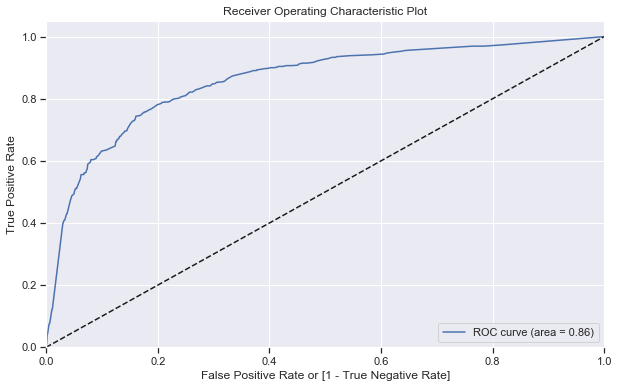

In [177]:
draw_roc(y_test, probability)

In [178]:
p, r, thresholds = precision_recall_curve(y_test, probability)

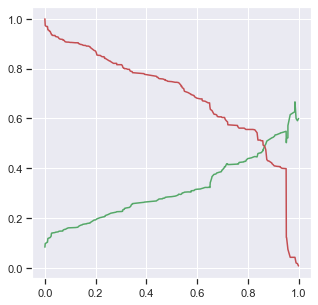

In [179]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

In [180]:
parameters = parameters.append({'Model' : 'Decision Tree on PCA Dataset - Tuned', 
                                'TP' : TP, 'FP' : FP, 'TN' : TN, 'FN' : FN,
                                'Accuracy' : Accuracy, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 
                                'Precision' : Precision, 'Recall' : Recall,
                                'FPR' : FPR, 'PPV' : PPV, 'NPV' : NPV, 'AUC' : AUC}, ignore_index = True)

---

### 2.2.4. Random Forest on PCA Dataset

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rfc = RandomForestClassifier()

In [183]:
rfc.fit(X_train_pca, y_train_res)

RandomForestClassifier()

In [184]:
y_pred = rfc.predict(X_test_pca)

In [185]:
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

(2.0, 0.0)

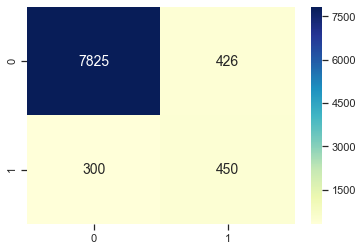

In [186]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [187]:
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [188]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.9193422953005221
Sensitivity               :  0.6
Specificity               :  0.9483698945582354
False Positive Rate       :  0.051630105441764634
Positive Predictive Value :  0.5136986301369864
Negative Predictive Value :  0.963076923076923
Precision                 :  0.5136986301369864
Recall                    :  0.6


In [189]:
probability = rfc.predict_proba(X_test_pca)[:, 1]

In [190]:
AUC = roc_auc_score(y_test, probability)

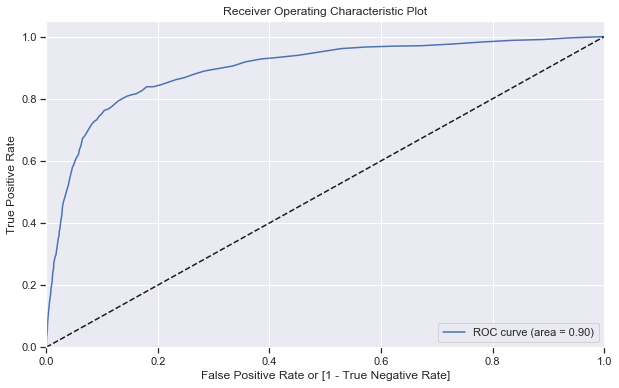

In [191]:
draw_roc(y_test, probability)

In [192]:
p, r, thresholds = precision_recall_curve(y_test, probability)

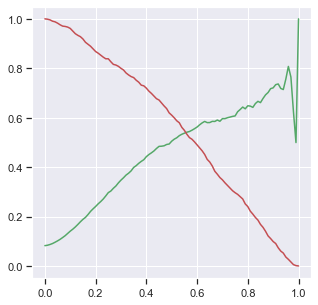

In [193]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

In [194]:
parameters = parameters.append({'Model' : 'Random Forest on PCA Dataset', 
                                'TP' : TP, 'FP' : FP, 'TN' : TN, 'FN' : FN,
                                'Accuracy' : Accuracy, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 
                                'Precision' : Precision, 'Recall' : Recall,
                                'FPR' : FPR, 'PPV' : PPV, 'NPV' : NPV, 'AUC' : AUC}, ignore_index = True)

---

### 2.2.5. Random Forest with Hyperparameter Tuning

In [195]:
param_grid = {
    'max_depth': [4, 8, 10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100, 200, 300], 
    'max_features': [5, 10]
}

In [196]:
rfc = RandomForestClassifier()

In [197]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = -1,
                           verbose = 1,
                           scoring = 'recall')

In [198]:
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 45.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [199]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

In [200]:
rfc = RandomForestClassifier(max_depth = 10,
                             min_samples_leaf = 100, 
                             min_samples_split = 200,
                             max_features = 10,
                             n_estimators = 200)

In [201]:
rfc.fit(X_train_pca, y_train_res)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

In [202]:
y_pred = rfc.predict(X_test_pca)

In [203]:
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

(2.0, 0.0)

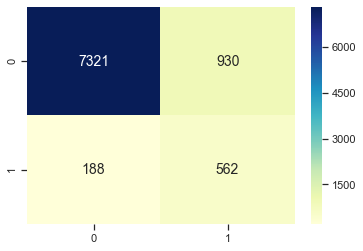

In [204]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [205]:
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [206]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.8757915787134762
Sensitivity               :  0.7493333333333333
Specificity               :  0.887286389528542
False Positive Rate       :  0.112713610471458
Positive Predictive Value :  0.37667560321715815
Negative Predictive Value :  0.9749633772805966
Precision                 :  0.37667560321715815
Recall                    :  0.7493333333333333


In [207]:
probability = rfc.predict_proba(X_test_pca)[:, 1]

In [208]:
AUC = roc_auc_score(y_test, probability)

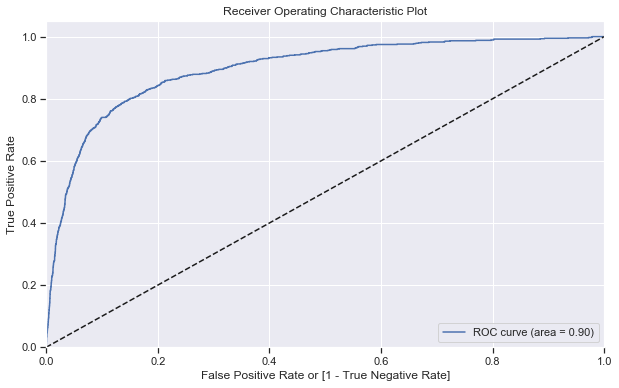

In [209]:
draw_roc(y_test, probability)

In [210]:
p, r, thresholds = precision_recall_curve(y_test, probability)

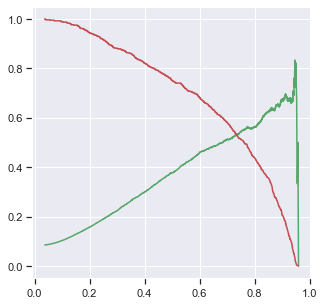

In [211]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

In [212]:
parameters = parameters.append({'Model' : 'Random Forest on PCA Dataset - Tuned', 
                                'TP' : TP, 'FP' : FP, 'TN' : TN, 'FN' : FN,
                                'Accuracy' : Accuracy, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 
                                'Precision' : Precision, 'Recall' : Recall,
                                'FPR' : FPR, 'PPV' : PPV, 'NPV' : NPV, 'AUC' : AUC}, ignore_index = True)

---

### 2.2.6. Conclusion

We did PCA to perform dimensionality reduction on the dataset and then applied different models on the reduced dataset to predict whether a high value customer will churn or not. Since in this case, it is more important to identify churners than non-churners, the appropriate metric to evaluate will be recall or sensitivity. We applied different models and also tuned them to have optimal performance. Since the dataset was highly imbalanced we also handled the class imbalance problem using SMOTE of the algorithm models.

In [213]:
parameters = parameters.round(2)

In [214]:
parameters = parameters[['Model', 'TP', 'TN', 'FP', 'FN', 'Accuracy', 'Sensitivity', 'Specificity', 
                        'Precision', 'Recall', 'FPR', 'PPV', 'NPV', 'AUC']]

In [215]:
parameters

Model   TP    TN    FP   FN  Accuracy  Sensitivity  Specificity  Precision  Recall   FPR   PPV   NPV   AUC
0    Logistic Regression on PCA Dataset  600  7097  1154  150      0.86         0.80         0.86       0.34    0.80  0.14  0.34  0.98  0.90
1          Decision Tree on PCA Dataset  395  7198  1053  355      0.84         0.53         0.87       0.27    0.53  0.13  0.27  0.95  0.70
2  Decision Tree on PCA Dataset - Tuned  559  6871  1380  191      0.83         0.75         0.83       0.29    0.75  0.17  0.29  0.97  0.86
3          Random Forest on PCA Dataset  450  7825   426  300      0.92         0.60         0.95       0.51    0.60  0.05  0.51  0.96  0.90
4  Random Forest on PCA Dataset - Tuned  562  7321   930  188      0.88         0.75         0.89       0.38    0.75  0.11  0.38  0.97  0.90

By comparing the various model performance and considering the metrics Sensitivity/Recall to be important in this case, we can conclude that the best performing model is Logistic Regression. With that model we were able to achieve the lowest false negatives for our prediction and also highest AUC score.

---

## 2.3. Interprettable Model 1 - Logistic Regression

PCA is limited to linearity and works well with linear models like linear regression, logistic regression etc. It removes multicollinearity. But with PCA the model loses its interpretability. Further, PCA assumes that columns with low variance are not useful. Especially for classification problems where the data has high imbalance certain columns of low variance may be significant to get the final output. So, without applying PCA, we will use the X_train_res (train data set created with SMOTE to address imbalance) and X_test.

In this section we will apply Logistic Regression on the dataset without any PCA. To reduce the number of features, we used recursive feature elimination (RFE). 

In [216]:
print("Dimensions of Train Dataset : ", X_train_res.shape)
print("Dimensions of Test Dataset  : ", X_test.shape)

Dimensions of Train Dataset :  (38618, 91)
Dimensions of Test Dataset  :  (9001, 91)


In [217]:
from sklearn.feature_selection import RFE

In [218]:
lr = LogisticRegression()

In [219]:
lr.fit(X_train_res, y_train_res)

LogisticRegression()

### 2.3.1. Recursive Feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Since in our dataset we have 70 features, selecting them manually, one by one, or taking all the features and eliminating them one by one is not feasible. So we will use RFE to choose 12 features that are significant.

In [220]:
rfe = RFE(lr, 12)

In [221]:
rfe = rfe.fit(X_train_res, y_train_res)

In [222]:
col = X_train.columns[rfe.support_] 

In [223]:
col

Index(['arpu_8', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8', 'total_rech_data_amt_8', 'last_rech_8'], dtype='object')

### 2.3.2. Manual Feature Elimination

We applied RFE (recursive feature elimination) an inbuilt feature to reduce the number of variables. We have selected 12 features that are significant. Now, let us manually eliminate the features one by one, by observing the statistical values, p-value and / or VIF. We can drop the variables with highest p-value. A p-value > 0.05 is considered insignificant.  We can complement this information with the VIF (Virtual Inflation Factor). VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. A value < 5 is considered good fit. Sometimes VIF is infinity, which means that there exists a higher degree of collinearity between the variable and others. 

In [224]:
X_train_rfe = X_train_res[col]

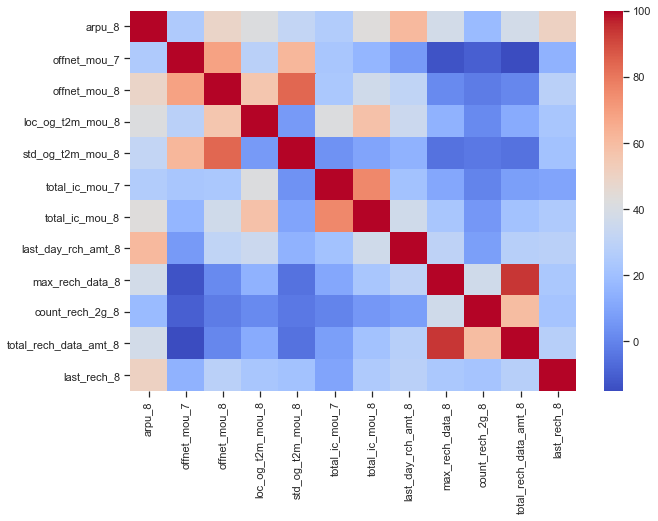

In [225]:
correlation = X_train_rfe.corr()

f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(round(correlation * 100, 0), annot = False, cmap = "coolwarm")
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [226]:
import statsmodels.api as sml
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [227]:
X_train_sm = sml.add_constant(X_train_rfe)
lr1 = sml.GLM(y_train_res, X_train_sm, family = sml.families.Binomial())
lr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14247.
Date:                Wed, 01 Jul 2020   Deviance:                       28494.
Time:                        18:39:25   Pearson chi2:                 8.20e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0704      0.018     -3.845      0.000      -0.106      -0.035
arpu_8                   -0.3738      0.027    -13.970      0.000      -0.426      -0.321
offnet_mou_7              0.4653      0.028     16.642      0.000       0.410       0.520
offnet_mou_8              0.8449      0.074     11.433      0.000       0.700       0.990
loc_og_t2m_mou_8         -1.0873      0.046    -23.542      0.000      -1.178      -0.997
std_og_t2m_mou_8         -0.9957      0.058    -17.170      0.000      -1.109      -0.882
total_ic_mou_7            0.4936      0.033     14.758      0.000       0.428       0.559
total_ic_mou_8           -1.2850      0.048    -26.529      0.000      -1.380      -1.190
last_day_rch_amt_8       -0.6362      0.018    -36.004      0.000      -0.671      -0.602
max_rech_data_8          -0.7869      0.073    -10.724      0.000      -0.931      -0.643
count_rech_2g_8          -0.4976      0.039    -12.777      0.000      -0.574      -0.421
total_rech_data_amt_8     0.3903      0.087      4.473      0.000       0.219       0.561
last_rech_8              -0.7482      0.022    -34.515      0.000      -0.791      -0.706
=========================================================================================
"""

In [228]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(5)

Features    VIF
10  total_rech_data_amt_8  29.33
2            offnet_mou_8  22.02
8         max_rech_data_8  21.64
4        std_og_t2m_mou_8  13.73
3        loc_og_t2m_mou_8   6.48

In [229]:
X_train_rfe.drop('total_rech_data_amt_8', axis = 1, inplace = True) # VIF > 5

In [230]:
col = col.drop('total_rech_data_amt_8')

In [231]:
X_train_sm = sml.add_constant(X_train_rfe)
lr2 = sml.GLM(y_train_res, X_train_sm, family = sml.families.Binomial())
lr2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38606
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14257.
Date:                Wed, 01 Jul 2020   Deviance:                       28513.
Time:                        18:39:25   Pearson chi2:                 8.33e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0715      0.018     -3.909      0.000      -0.107      -0.036
arpu_8                -0.3706      0.027    -13.862      0.000      -0.423      -0.318
offnet_mou_7           0.4594      0.028     16.464      0.000       0.405       0.514
offnet_mou_8           0.8414      0.074     11.406      0.000       0.697       0.986
loc_og_t2m_mou_8      -1.0869      0.046    -23.554      0.000      -1.177      -0.996
std_og_t2m_mou_8      -0.9925      0.058    -17.146      0.000      -1.106      -0.879
total_ic_mou_7         0.4918      0.033     14.717      0.000       0.426       0.557
total_ic_mou_8        -1.2884      0.048    -26.594      0.000      -1.383      -1.193
last_day_rch_amt_8    -0.6346      0.018    -35.937      0.000      -0.669      -0.600
max_rech_data_8       -0.4690      0.017    -27.038      0.000      -0.503      -0.435
count_rech_2g_8       -0.3594      0.023    -15.542      0.000      -0.405      -0.314
last_rech_8           -0.7413      0.022    -34.370      0.000      -0.784      -0.699
======================================================================================
"""

In [232]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(5)

Features    VIF
2      offnet_mou_8  22.02
4  std_og_t2m_mou_8  13.73
3  loc_og_t2m_mou_8   6.48
6    total_ic_mou_8   3.46
5    total_ic_mou_7   2.68

In [233]:
X_train_rfe.drop('offnet_mou_8', axis = 1, inplace = True) # VIF > 5

In [234]:
col = col.drop('offnet_mou_8')

In [235]:
X_train_sm = sml.add_constant(X_train_rfe)
lr3 = sml.GLM(y_train_res, X_train_sm, family = sml.families.Binomial())
lr3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38607
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14328.
Date:                Wed, 01 Jul 2020   Deviance:                       28657.
Time:                        18:39:26   Pearson chi2:                 9.84e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0808      0.018     -4.421      0.000      -0.117      -0.045
arpu_8                -0.3123      0.026    -11.999      0.000      -0.363      -0.261
offnet_mou_7           0.5697      0.027     20.940      0.000       0.516       0.623
loc_og_t2m_mou_8      -0.7336      0.033    -22.265      0.000      -0.798      -0.669
std_og_t2m_mou_8      -0.4059      0.024    -16.970      0.000      -0.453      -0.359
total_ic_mou_7         0.4777      0.034     14.249      0.000       0.412       0.543
total_ic_mou_8        -1.3046      0.049    -26.762      0.000      -1.400      -1.209
last_day_rch_amt_8    -0.6169      0.018    -35.156      0.000      -0.651      -0.582
max_rech_data_8       -0.4780      0.017    -27.667      0.000      -0.512      -0.444
count_rech_2g_8       -0.3658      0.023    -15.850      0.000      -0.411      -0.321
last_rech_8           -0.7299      0.021    -34.030      0.000      -0.772      -0.688
======================================================================================
"""

In [236]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5      total_ic_mou_8  3.46
4      total_ic_mou_7  2.68
0              arpu_8  2.44
1        offnet_mou_7  2.07
3    std_og_t2m_mou_8  1.92
2    loc_og_t2m_mou_8  1.79
6  last_day_rch_amt_8  1.68
7     max_rech_data_8  1.41
9         last_rech_8  1.41
8     count_rech_2g_8  1.20

The p-values are less than 0.05 and VIF < 5. Let us evaluate this model further.

### 2.3.3. Evaluating the Model

In [237]:
model = lr3.fit()

In [238]:
y_train_pred = model.predict(X_train_sm)

In [239]:
df = pd.DataFrame({ 'Churn'         : y_train_res, 
                    'Probability'   : y_train_pred
                  })

In [240]:
df['Predicted'] = df.Probability.map(lambda x: 1 if x > 0.5 else 0)

In [241]:
dfcm = pd.DataFrame(confusion_matrix(df.Churn, df.Predicted), range(2), range(2))

(2.0, 0.0)

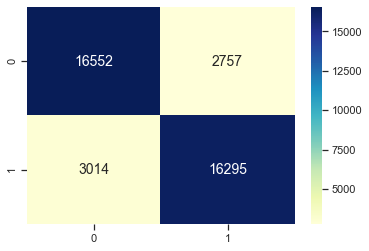

In [242]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [243]:
confusion = confusion_matrix(df.Churn, df.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [244]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.8505619141333057
Sensitivity               :  0.8439069863794085
Specificity               :  0.8572168418872028
False Positive Rate       :  0.14278315811279715
Positive Predictive Value :  0.8552907831198824
Negative Predictive Value :  0.8459572728201983
Precision                 :  0.8552907831198824
Recall                    :  0.8439069863794085


### 2.3.5. Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [245]:
AUC = roc_auc_score(df.Churn, df.Probability)

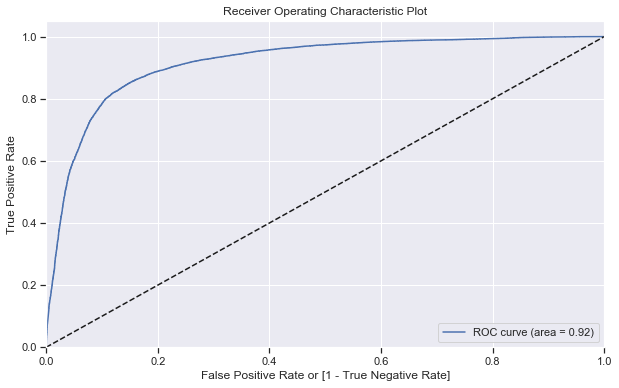

In [246]:
draw_roc(df.Churn, df.Probability)

In [247]:
p, r, thresholds = precision_recall_curve(df.Churn, df.Probability)

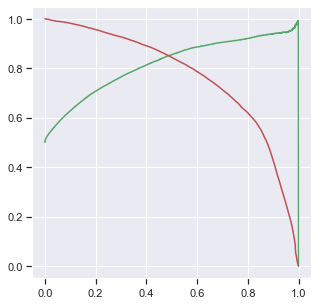

In [248]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

### 2.3.5. Finding Optimal Cutoff

In [249]:
for i in range(1, 10): df[i / 10] = df.Probability.map(lambda x: 1 if x > (i / 10) else 0)

In [250]:
cutoff = pd.DataFrame(columns = ['Probability',
                                 'Accuracy',
                                 'Sensitivity',
                                 'Specificity', 
                                 'False Positive Rate', 
                                 'Positive Predictive Value', 
                                 'Negative Predictive Value'])

In [251]:
for num in range(1, 10):
    
    i = num / 10
    
    confusion = metrics.confusion_matrix(df.Churn, df[i])
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    probability = i
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    false_positive_rate = FP / (TN + FP)
    positive_pred_value = TP / (TP + FP)
    negative_pred_value = TN / (TN + FN)
    
    cutoff.loc[i] = [i, accuracy, sensitivity, specificity, false_positive_rate, positive_pred_value, negative_pred_value]

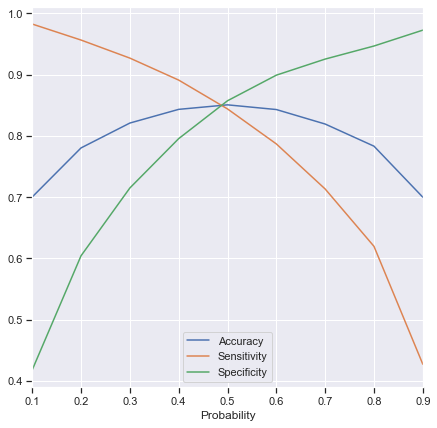

In [252]:
cutoff.plot.line(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity'], figsize=(7, 7))

### 2.3.6. Predicting with Test Data

In [253]:
X_test_rfe = X_test[col]

In [254]:
X_test_sm = sml.add_constant(X_test_rfe)

In [255]:
y_test_pred = model.predict(X_test_sm)

In [256]:
y_test_pred = y_test_pred.values.reshape(-1)

In [257]:
df = pd.DataFrame({'Churn'       : y_test.values, 
                   'Probability' : y_test_pred})

In [258]:
df['Predicted'] = df.Probability.map(lambda x: 1 if x > 0.425 else 0)

In [259]:
dfcm = pd.DataFrame(confusion_matrix(df.Churn, df.Predicted), range(2), range(2))

(2.0, 0.0)

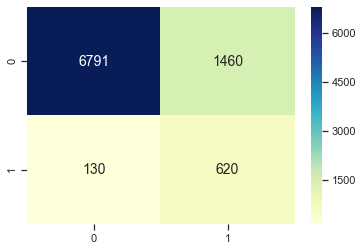

In [260]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [261]:
confusion = confusion_matrix(df.Churn, df.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [262]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.8233529607821353
Sensitivity               :  0.8266666666666667
Specificity               :  0.8230517513028723
False Positive Rate       :  0.1769482486971276
Positive Predictive Value :  0.2980769230769231
Negative Predictive Value :  0.9812165871983818
Precision                 :  0.2980769230769231
Recall                    :  0.8266666666666667


In [263]:
AUC = roc_auc_score(df.Churn, df.Probability)

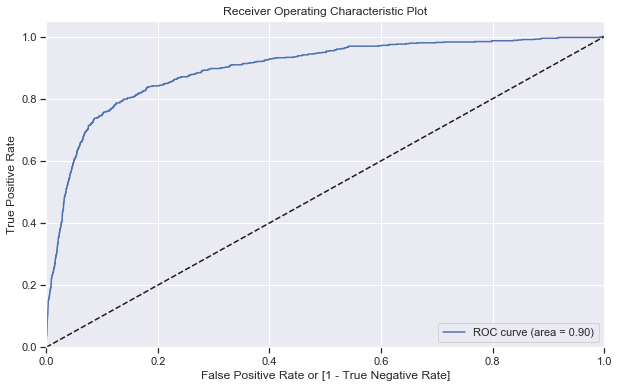

In [264]:
draw_roc(df.Churn, df.Probability)

In [265]:
p, r, thresholds = precision_recall_curve(df.Churn, df.Probability)

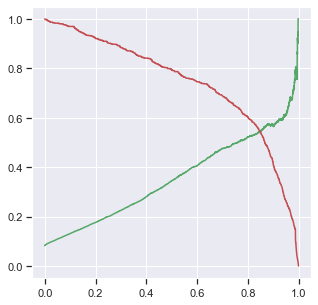

In [266]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

In [267]:
parameters = parameters.append({'Model' : 'Logistic Regression - Interpretable', 
                                'TP' : TP, 'FP' : FP, 'TN' : TN, 'FN' : FN,
                                'Accuracy' : Accuracy, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 
                                'Precision' : Precision, 'Recall' : Recall,
                                'FPR' : FPR, 'PPV' : PPV, 'NPV' : NPV, 'AUC' : AUC}, ignore_index = True)

In [268]:
parameters.round(2)

Model   TP    TN    FP   FN  Accuracy  Sensitivity  Specificity  Precision  Recall   FPR   PPV   NPV   AUC
0    Logistic Regression on PCA Dataset  600  7097  1154  150      0.86         0.80         0.86       0.34    0.80  0.14  0.34  0.98  0.90
1          Decision Tree on PCA Dataset  395  7198  1053  355      0.84         0.53         0.87       0.27    0.53  0.13  0.27  0.95  0.70
2  Decision Tree on PCA Dataset - Tuned  559  6871  1380  191      0.83         0.75         0.83       0.29    0.75  0.17  0.29  0.97  0.86
3          Random Forest on PCA Dataset  450  7825   426  300      0.92         0.60         0.95       0.51    0.60  0.05  0.51  0.96  0.90
4  Random Forest on PCA Dataset - Tuned  562  7321   930  188      0.88         0.75         0.89       0.38    0.75  0.11  0.38  0.97  0.90
5   Logistic Regression - Interpretable  620  6791  1460  130      0.82         0.83         0.82       0.30    0.83  0.18  0.30  0.98  0.90

### 2.3.6. Predicting Parameters

The predicting parameters in this case are: total_ic_mou_8, total_ic_mou_7, arpu_8, offnet_mou_7, std_og_t2m_mou_8, loc_og_t2m_mou_8, last_day_rch_amt_8, max_rech_data_8, last_rech_8, count_rech_2g_8. Except offnet_mou_7 and total_ic_mou_7, others parameters have a negative coefficient in predicting the churn probability.

---

## 2.4. Random Forest - Interpretable

In [269]:
rfc = RandomForestClassifier()

In [270]:
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [271]:
y_pred = rfc.predict(X_test)

In [272]:
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

(2.0, 0.0)

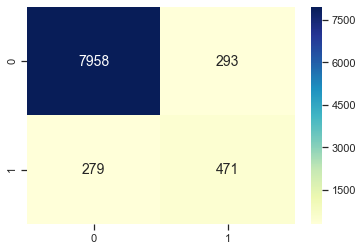

In [273]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [274]:
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [275]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.9364515053882901
Sensitivity               :  0.628
Specificity               :  0.96448915282996
False Positive Rate       :  0.035510847170039994
Positive Predictive Value :  0.6164921465968587
Negative Predictive Value :  0.966128444822144
Precision                 :  0.6164921465968587
Recall                    :  0.628


In [276]:
probability = rfc.predict_proba(X_test)[:, 1]

In [277]:
AUC = roc_auc_score(y_test, probability)

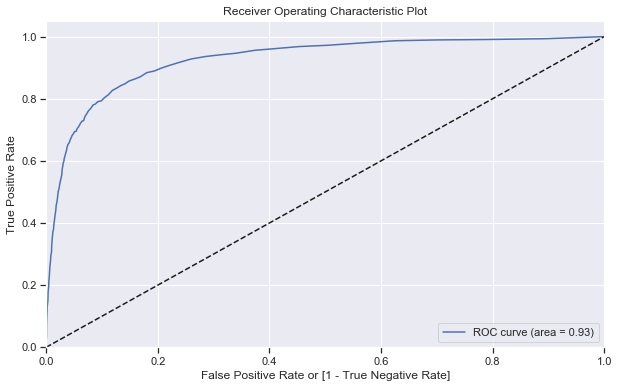

In [278]:
draw_roc(y_test, probability)

In [279]:
p, r, thresholds = precision_recall_curve(y_test, probability)

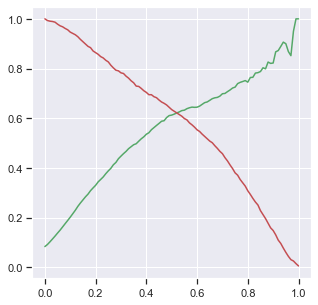

In [280]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

In [281]:
parameters = parameters.append({'Model' : 'Random Forest - Interpretable', 
                                'TP' : TP, 'FP' : FP, 'TN' : TN, 'FN' : FN,
                                'Accuracy' : Accuracy, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 
                                'Precision' : Precision, 'Recall' : Recall,
                                'FPR' : FPR, 'PPV' : PPV, 'NPV' : NPV, 'AUC' : AUC}, ignore_index = True)

In [282]:
parameters.round(2)

Model   TP    TN    FP   FN  Accuracy  Sensitivity  Specificity  Precision  Recall   FPR   PPV   NPV   AUC
0    Logistic Regression on PCA Dataset  600  7097  1154  150      0.86         0.80         0.86       0.34    0.80  0.14  0.34  0.98  0.90
1          Decision Tree on PCA Dataset  395  7198  1053  355      0.84         0.53         0.87       0.27    0.53  0.13  0.27  0.95  0.70
2  Decision Tree on PCA Dataset - Tuned  559  6871  1380  191      0.83         0.75         0.83       0.29    0.75  0.17  0.29  0.97  0.86
3          Random Forest on PCA Dataset  450  7825   426  300      0.92         0.60         0.95       0.51    0.60  0.05  0.51  0.96  0.90
4  Random Forest on PCA Dataset - Tuned  562  7321   930  188      0.88         0.75         0.89       0.38    0.75  0.11  0.38  0.97  0.90
5   Logistic Regression - Interpretable  620  6791  1460  130      0.82         0.83         0.82       0.30    0.83  0.18  0.30  0.98  0.90
6         Random Forest - Interpretable  471  7958   293  279      0.94         0.63         0.96       0.62    0.63  0.04  0.62  0.97  0.93

### 2.4.1. Hyperparameter Tuning for Random Forest

In [283]:
rfc = RandomForestClassifier()

In [284]:
param_grid = {
    'max_depth': [4, 8, 10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [100, 200, 300, 500], 
    'max_features': [5, 10]
}

In [285]:
grid_search = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = -1,
                           verbose = 1,
                           scoring='recall')

In [286]:
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 20.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 300, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': [100, 200, 300, 500]},
             scoring='recall', verbose=1)

In [287]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 100}

In [288]:
rfc = RandomForestClassifier(max_depth = 10,
                             min_samples_leaf = 100, 
                             min_samples_split = 200,
                             max_features = 10,
                             n_estimators = 100)

In [289]:
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [290]:
y_pred = rfc.predict(X_test)

In [291]:
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

(2.0, 0.0)

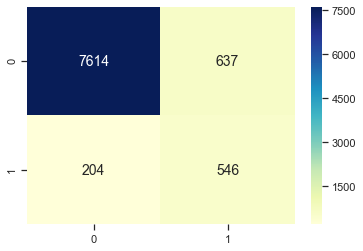

In [292]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [293]:
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [294]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.906565937118098
Sensitivity               :  0.728
Specificity               :  0.9227972366985819
False Positive Rate       :  0.07720276330141801
Positive Predictive Value :  0.46153846153846156
Negative Predictive Value :  0.9739063699155794
Precision                 :  0.46153846153846156
Recall                    :  0.728


In [295]:
probability = rfc.predict_proba(X_test)[:, 1]

In [296]:
AUC = roc_auc_score(y_test, probability)

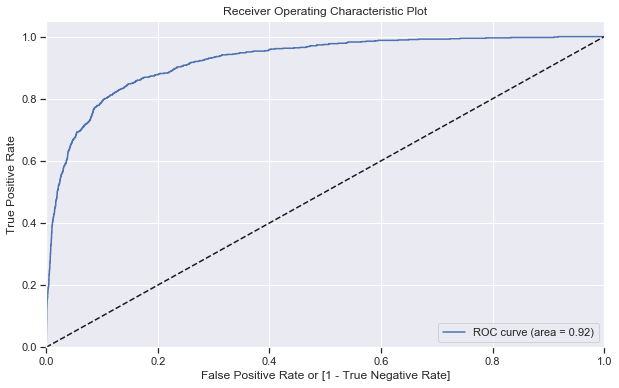

In [297]:
draw_roc(y_test, probability)

In [298]:
p, r, thresholds = precision_recall_curve(y_test, probability)

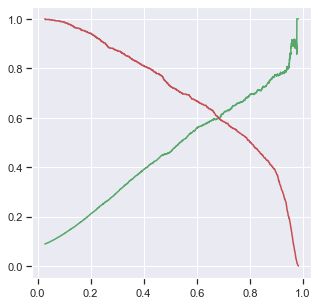

In [299]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

In [300]:
parameters = parameters.append({'Model' : 'Random Forest - Interpretable - Tuned', 
                                'TP' : TP, 'FP' : FP, 'TN' : TN, 'FN' : FN,
                                'Accuracy' : Accuracy, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 
                                'Precision' : Precision, 'Recall' : Recall,
                                'FPR' : FPR, 'PPV' : PPV, 'NPV' : NPV, 'AUC' : AUC}, ignore_index = True)

In [301]:
parameters.round(2)

Model   TP    TN    FP   FN  Accuracy  Sensitivity  Specificity  Precision  Recall   FPR   PPV   NPV   AUC
0     Logistic Regression on PCA Dataset  600  7097  1154  150      0.86         0.80         0.86       0.34    0.80  0.14  0.34  0.98  0.90
1           Decision Tree on PCA Dataset  395  7198  1053  355      0.84         0.53         0.87       0.27    0.53  0.13  0.27  0.95  0.70
2   Decision Tree on PCA Dataset - Tuned  559  6871  1380  191      0.83         0.75         0.83       0.29    0.75  0.17  0.29  0.97  0.86
3           Random Forest on PCA Dataset  450  7825   426  300      0.92         0.60         0.95       0.51    0.60  0.05  0.51  0.96  0.90
4   Random Forest on PCA Dataset - Tuned  562  7321   930  188      0.88         0.75         0.89       0.38    0.75  0.11  0.38  0.97  0.90
5    Logistic Regression - Interpretable  620  6791  1460  130      0.82         0.83         0.82       0.30    0.83  0.18  0.30  0.98  0.90
6          Random Forest - Interpretable  471  7958   293  279      0.94         0.63         0.96       0.62    0.63  0.04  0.62  0.97  0.93
7  Random Forest - Interpretable - Tuned  546  7614   637  204      0.91         0.73         0.92       0.46    0.73  0.08  0.46  0.97  0.92

### 2.4.2. Top 10 Features

In [302]:
features = pd.concat([pd.Series(X_train_res.columns),
                      pd.Series(rfc.feature_importances_)], axis=1).rename(columns = {0 : 'Features',1 : 'Weight'})

top10 = features.sort_values(by = 'Weight', ascending = False).head(10)

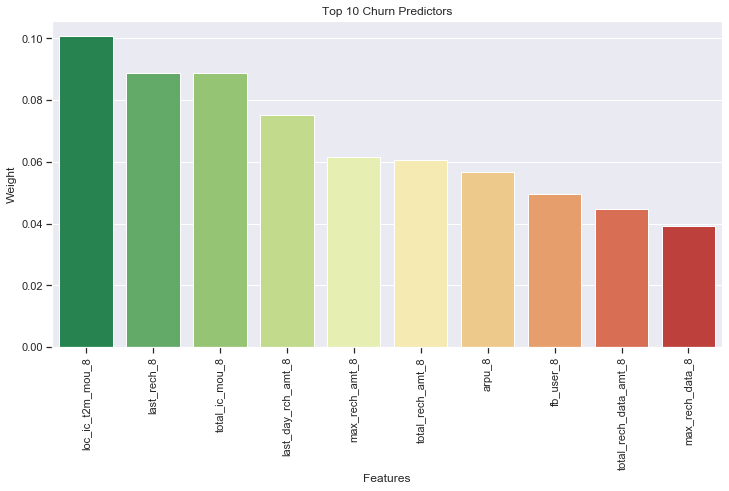

In [303]:
plt.figure(figsize = (12, 6))
ax = sns.barplot(data = top10, x = 'Features', y = 'Weight', palette = 'RdYlGn_r')
ax.set_title("Top 10 Churn Predictors")
plt.xticks(rotation = 90)
plt.show()

---

## 2.5. Decision Tree - Interpretable

In [304]:
dt = DecisionTreeClassifier(max_depth = 3)

In [305]:
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=3)

In [306]:
y_pred = dt.predict(X_test)

In [307]:
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

(2.0, 0.0)

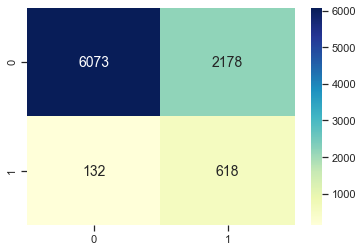

In [308]:
ax = sns.heatmap(dfcm, annot = True, annot_kws = {"size": 14}, cmap = 'YlGnBu', fmt = 'g')
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

In [309]:
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy    = (TP + TN) / (TP + TN + FP + FN)
Sensitivity = TP / float(TP + FN)
Specificity = TN / float(TN + FP)

FPR = FP / float(TN + FP)
PPV = TP / float(TP + FP)
NPV = TN / float(TN + FN)

Precision = TP / float(TP + FP)
Recall    = TP / float(TP + FN)

In [310]:
print('Accuracy                  : ', Accuracy)
print('Sensitivity               : ', Sensitivity)
print('Specificity               : ', Specificity)
print('False Positive Rate       : ', FPR)
print('Positive Predictive Value : ', PPV)
print('Negative Predictive Value : ', NPV)
print('Precision                 : ', Precision)
print('Recall                    : ', Recall)  # Same as Sensitivity

Accuracy                  :  0.7433618486834797
Sensitivity               :  0.824
Specificity               :  0.7360319961216822
False Positive Rate       :  0.26396800387831776
Positive Predictive Value :  0.22103004291845493
Negative Predictive Value :  0.9787268331990331
Precision                 :  0.22103004291845493
Recall                    :  0.824


In [311]:
probability = rfc.predict_proba(X_test)[:, 1]

In [312]:
AUC = roc_auc_score(y_test, probability)

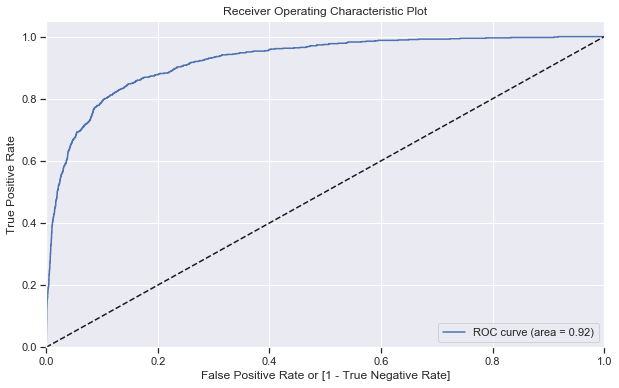

In [313]:
draw_roc(y_test, probability)

In [314]:
p, r, thresholds = precision_recall_curve(y_test, probability)

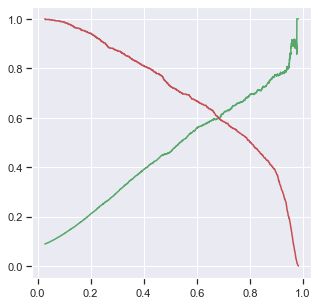

In [315]:
plt.figure(figsize=(5, 5))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

In [316]:
parameters = parameters.append({'Model' : 'Decision Tree - Interpretable', 
                                'TP' : TP, 'FP' : FP, 'TN' : TN, 'FN' : FN,
                                'Accuracy' : Accuracy, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 
                                'Precision' : Precision, 'Recall' : Recall,
                                'FPR' : FPR, 'PPV' : PPV, 'NPV' : NPV, 'AUC' : AUC}, ignore_index = True)

In [317]:
parameters.round(2)

Model   TP    TN    FP   FN  Accuracy  Sensitivity  Specificity  Precision  Recall   FPR   PPV   NPV   AUC
0     Logistic Regression on PCA Dataset  600  7097  1154  150      0.86         0.80         0.86       0.34    0.80  0.14  0.34  0.98  0.90
1           Decision Tree on PCA Dataset  395  7198  1053  355      0.84         0.53         0.87       0.27    0.53  0.13  0.27  0.95  0.70
2   Decision Tree on PCA Dataset - Tuned  559  6871  1380  191      0.83         0.75         0.83       0.29    0.75  0.17  0.29  0.97  0.86
3           Random Forest on PCA Dataset  450  7825   426  300      0.92         0.60         0.95       0.51    0.60  0.05  0.51  0.96  0.90
4   Random Forest on PCA Dataset - Tuned  562  7321   930  188      0.88         0.75         0.89       0.38    0.75  0.11  0.38  0.97  0.90
5    Logistic Regression - Interpretable  620  6791  1460  130      0.82         0.83         0.82       0.30    0.83  0.18  0.30  0.98  0.90
6          Random Forest - Interpretable  471  7958   293  279      0.94         0.63         0.96       0.62    0.63  0.04  0.62  0.97  0.93
7  Random Forest - Interpretable - Tuned  546  7614   637  204      0.91         0.73         0.92       0.46    0.73  0.08  0.46  0.97  0.92
8          Decision Tree - Interpretable  618  6073  2178  132      0.74         0.82         0.74       0.22    0.82  0.26  0.22  0.98  0.92

In [318]:
# Does not work if scikit-learn is upgraded to 0.23 - Downgrade using !pip install --upgrade scikit-learn==0.20.3

from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [319]:
features = list(hvc.columns[1:])

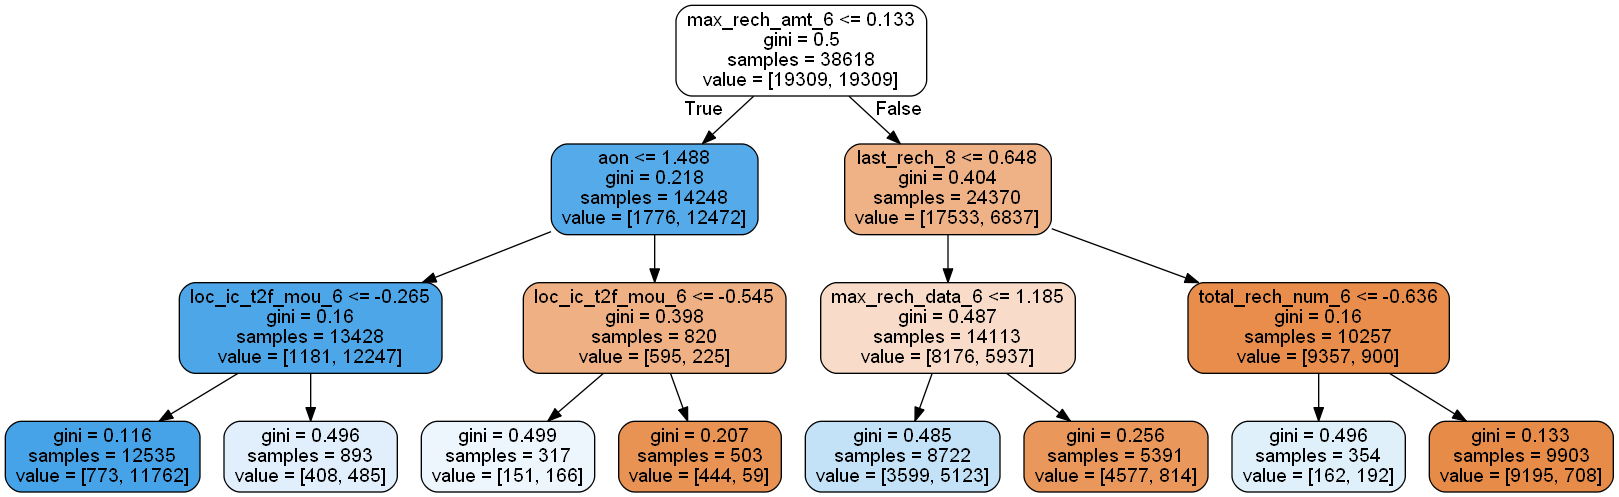

In [320]:
dot_data = StringIO()  
export_graphviz(dt, 
                out_file = dot_data,
                feature_names = features, 
                filled = True,
                rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

---

## 2.6. Model Selection, Churn Indicators and Recommendations

We tried a variety of models and captured various metrics connected to it. A summary is given below.

In [329]:
parameters.round(2)

Model   TP    TN    FP   FN  Accuracy  Sensitivity  Specificity  Precision  Recall   FPR   PPV   NPV   AUC
0     Logistic Regression on PCA Dataset  600  7097  1154  150      0.86         0.80         0.86       0.34    0.80  0.14  0.34  0.98  0.90
1           Decision Tree on PCA Dataset  395  7198  1053  355      0.84         0.53         0.87       0.27    0.53  0.13  0.27  0.95  0.70
2   Decision Tree on PCA Dataset - Tuned  559  6871  1380  191      0.83         0.75         0.83       0.29    0.75  0.17  0.29  0.97  0.86
3           Random Forest on PCA Dataset  450  7825   426  300      0.92         0.60         0.95       0.51    0.60  0.05  0.51  0.96  0.90
4   Random Forest on PCA Dataset - Tuned  562  7321   930  188      0.88         0.75         0.89       0.38    0.75  0.11  0.38  0.97  0.90
5    Logistic Regression - Interpretable  620  6791  1460  130      0.82         0.83         0.82       0.30    0.83  0.18  0.30  0.98  0.90
6          Random Forest - Interpretable  471  7958   293  279      0.94         0.63         0.96       0.62    0.63  0.04  0.62  0.97  0.93
7  Random Forest - Interpretable - Tuned  546  7614   637  204      0.91         0.73         0.92       0.46    0.73  0.08  0.46  0.97  0.92
8          Decision Tree - Interpretable  618  6073  2178  132      0.74         0.82         0.74       0.22    0.82  0.26  0.22  0.98  0.92

### Choosing the Model based on Metrics.

We understood that the data is having imbalance. Only 8% of the customers churn. 

The **accuracy** is computed as **correct predictions (TP + TN) / total predictions (TP + TN + FP + FN)**. The model may predict the negative class that is heavier and get a high value of accuracy, still failing to correctly identify the true positives (churns) - this will not help the business. On the other hand, **recall (or sensitivity)** is computed as **predicted churn (TP) / actual churn (TP + FN)** which gives a clear idea of out of the total number of churns, how much could the model predict. This is also known as **true positive rate**. So we have to go for a model with high sensitivity. 

But there is a slight disadvantage to it. What if the model predicts a lot of non churn as churns? The business may invest on retaining them, though they might not have churned. The **false positive rate** has to be controlled. **falsely predicted as churn (FP)  / actual non churns (TN + FP)**. The true positive rate and false positive rate are calculated for several threshold values and plotted in the ROC curve. We choose a model where the area under curve (AUC) is maximum. We see that all the models gave a good AUC.

In our case we see that the **Logistic Regression** gave good sensitivity metric (83%) and AUC (90%). 

### Predictor Variables / Churn Indicators 

Unlike PCA, the model built on the dataset also gives us the predicting parameters: total_ic_mou_8, total_ic_mou_7, arpu_8, offnet_mou_7, std_og_t2m_mou_8, loc_og_t2m_mou_8, last_day_rch_amt_8, max_rech_data_8, last_rech_8, count_rech_2g_8. 

Except offnet_mou_7 and total_ic_mou_7, others parameters have a negative coefficient in predicting the churn probability.

|Predictor|Coefficient|Interpretation|
|:---|---:|:---|
|offnet_mou_7|0.5697|An increase in this value, increases the odds of churn.|
|total_ic_mou_7|0.4777|An increase in this value, increases the odds of churn.|
|arpu_8|-0.3123|A decrease in this value increases the odds of churn.|
|count_rech_2g_8|-0.3658|A decrease in this value increases the odds of churn.|
|std_og_t2m_mou_8|-0.4059|A decrease in this value increases the odds of churn.|
|max_rech_data_8|-0.478|A decrease in this value increases the odds of churn.|
|last_day_rch_amt_8|-0.6169|A decrease in this value increases the odds of churn.|
|last_rech_8|-0.7299|A decrease in this value increases the odds of churn.|
|loc_og_t2m_mou_8|-0.7336|A decrease in this value increases the odds of churn.|
|total_ic_mou_8|-1.3046|A decrease in this value increases the odds of churn.|

**total_ic_mou_7** has a positive coefficient and total_ic_mou_8 has a negative coefficient. An increase in the difference between these two will indicate an increase in the probability of the churn. The average revenue per user in the 8th month **arpu_8** has a negative coefficient, which indicates that the odds of churning being high when the amount decreases (if the revenue is more the churn probability will decrease). The usage of mobile to call other operators network in good phase **offnet_mou_7** has a positive coefficient, i.e. if the usage in good phase is more than that in action phase, the churn probability will increase. Outgoing usage, especially to other mobile networks (both local and std) - **std_og_t2m_mou_8**, **loc_og_t2m_mou_8** - have a negative coefficient. If the value increases, then the churn probability decreases. The maximum amount paid to recharge data **max_rech_data_8** has a negative coefficient, which means that any increase in this value is going to reduce the proabability of churn. 

### Recommendations

The churn probability is high if 

- the usage during the action phase reduces when compared to good month (7th month).
- the arpu (average revenue per user) from the customer reduces.
- the customer may not recharge as frequently as before (the number of times they recharge for data will come down)
- the customer may reduce the usage (both local and std) especially to other mobile networks
- the frequency of recharging the data package reduces and the max amount spent per recharge also decreases

Considering this, the telecom company may provide some **special offers connected to data packages** and **offers that will reward the customer for their out going local and std calls, especially to other mobile networks.** 